# Omdena Liverpool Chapter - Predicting RTC Severity

## Project Overview
Over the last few years improvements to roads in the UK have been implemented across the country in order to create a safer roading system with some great effect.  
However there still seems to be a rise in severe and fatal accidents.  
Using datasets from the Department of Transport, we hope to be able to uncover the probability of the severity of an accident.  
Using the following techniques we will develop and deploy a machine learning model to predict RTC severity:
- Preprocessing
- Exploratory Data Analysis
- Feature Engineering
- Modeling
- Machine Learning
  
The project has been broken down into six pipelines:
1. Data Engineering
2. Group 1 Predicting RTC Severity
3. Group 2 Geospatial Heatmap
4. Group 3 Time Series Analysis
5. Group 4 Vehicle Analysis and Predictions
6. Solution Deployment
  
**Pipeline 1** prepares the datasets for groups 1 - 4  
  
**Pipelines 2 - 5** will run concurrently and have three tasks:
- EDA
- Feature Engineering
- Model Development and Evaluation
  
**Pipeline 6** will bring together the models and create the solution to be deployed.  
  
Each Pipeline will produce a Jupyter notebook for their task, each being passed on to the next task until completion of all three tasks.  
The notebooks will be published on the Omdena Liverpool GitHub site.  
  
This is my attempt at **Pipeline 2, Group 1, Predicting RTC Severity EDA**.

## Predicting RTC Severity - EDA

Group 1 is tasked with predicting the road traffic collision severity.  
We will be using a dataset from the Department of Transport, consisting of over a million rows and 34 columns.  
It has a date range from 2005 to 2010.  

## Features
We have a reasonable set of features, lets take a look.

```
Accident_Index
- Unique number linking accident with vehicle(s)
1st_Road_Class
- Motorway
- A(M)
- A
- B
- C
- Unclassified
1st_Road_Number
- Number of road if applicable (not all roads have a number)
2nd_Road_Class
- None
- Motorway
- A(M)
- A
- B
- C
- Unclassified
2nd_Road_Number
- Number of road if applicable (not all roads have a number)
Accident_Severity
- Fatal
- Serious
- Slight
Carriageway_Hazards
- None
- Vehicle load on road
- Other object on road
- Previous accident
- Dog on road
- Other animal on road
- Pedestrian in carriageway - not injured
- Any animal in carriageway (except ridden horse)
- Data missing or out of range
- unknown (self reported)
Date
- Date of accident
Day_of_Week
- Day
Did_Police_Officer_Attend_Scene_of_Accident
- Yes
- No
- No - accident was reported using a self completion  form (self rep only)
Junction_Control
- Not at junction or within 20 metres
- Authorised person
- Auto traffic signal
- Stop sign
- Give way or uncontrolled
- Data missing or out of range
- unknown (self reported)
Junction_Detail
- Not at junction or within 20 metres
- Roundabout
- Mini-roundabout
- T or staggered junction
- Slip road
- Crossroads
- More than 4 arms (not roundabout)
- Private drive or entrance
- Other junction
- unknown (self reported)
Latitude
- Geographical information
Light_Conditions
- Daylight
- Darkness - lights lit
- Darkness - lights unlit
- Darkness - no lighting
- Darkness - lighting unknown
- Data missing or out of range
Local_Authority_(District)
- Geographical list of Districts
Local_Authority_(Highway)
- Geographical list of Local Highway Authorities
Location_Easting_OSGR
- Geographical information
Location_Northing_OSGR
- Geographical information
Longitude
- Geographical information
LSOA_of_Accident_Location
- Statistical location for Local Government
Number_of_Casualties
- Number or persons injured or killed
Number_of_Vehicles
- Number of vehicles involved in the accident
Pedestrian_Crossing-Human_Control
- None within 50 metres 
- Control by school crossing patrol
- Control by other authorised person
- Data missing or out of range
- unknown (self reported)
Pedestrian_Crossing-Physical_Facilities
- No physical crossing facilities within 50 metres
- Zebra
- Pelican, puffin, toucan or similar non-junction pedestrian light crossing
- Pedestrian phase at traffic signal junction
- Footbridge or subway
- Central refuge
- Data missing or out of range
- unknown (self reported)
Police_Force
- List of Police Forces across England, Whales and Scotland
Road_Surface_Conditions
- Dry
- Wet or damp
- Snow
- Frost or ice
- Flood over 3cm. deep
- Oil or diesel
- Mud
- Data missing or out of range
- unknown (self reported)
Road_Type
- Roundabout
- One way street
- Dual carriageway
- Single carriageway
- Slip road
- Unknown
- One way street/Slip road
Special_Conditions_at_Site
- None
- Auto traffic signal - out
- Auto signal part defective
- Road sign or marking defective or obscured
- Roadworks
- Road surface defective
- Oil or diesel
- Mud
- Data missing or out of range
- unknown (self reported)
Speed_limit
- 20,30,40,50,60,70 are the only valid speed limits on public highways
Time
- Time of accident
Urban_or_Rural_Area
- Urban
- Rural
- Unallocated
- Data missing or out of range
Weather_Conditions
- Fine no high winds
- Raining no high winds
- Snowing no high winds
- Fine + high winds
- Raining + high winds
- Snowing + high winds
- Fog or mist
- Other
- Unknown
- Data missing or out of range
Year
- Year of accident
InScotland
- In Scotland or not
```

## Import Dependancies

Lets import the modules we will be using, and add a little global styling.

In [200]:
# data manipulation
# conda install -c conda-forge pandas
import pandas as pd
# conda install -c conda-forge numpy
import numpy as np
# conda install -c conda-forge openpyxl
import openpyxl
# conda install -c conda-forge missingno
import missingno as msno

# data visualisation
# conda install -c conda-forge matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
# conda install -c conda-forge seaborn
import seaborn as sns

from datetime import datetime
import statistics

# apply some cool styling
rcParams['figure.figsize'] = (12,  6)
sns.set(style='darkgrid', palette='pastel', font_scale=1)

#  For showing all columns in Pandas
pd.set_option('display.max_columns', None)

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

## Importing and Loading Data into DataFrame

Lets import the dataset using pandas `pd.read_parquet` as `df_accident`, and have a quick look at some random rows.

In [201]:
df_accident = pd.read_parquet('C:/Users/kmedr/My Drive/Omdena_Predicting_RTC_main/DATA/parquet/accident_data.parquet')

In [202]:
# I like to use this method as it shows random rows.
df_accident.sample(n=10)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
658263,20083104D1581,A,612.0,Unclassified,0.0,Serious,None,13/06/2008,Friday,1.0,Auto traffic signal,Crossroads,52.970098,Daylight,Gedling,Nottinghamshire,463130.0,341830.0,-1.061413,E01028185,3,3,0.0,5.0,Nottinghamshire,Dry,Single carriageway,None,40,16:35,Rural,Fine no high winds,2008,No
485283,2.00733E+12,A,6.0,A,5125.0,Slight,None,08/08/2007,Wednesday,2.0,Give way or uncontrolled,T or staggered junction,52.772491,Daylight,Charnwood,Leicestershire,453530.0,319730.0,-1.207973,E01025720,1,1,0.0,4.0,Leicestershire,Dry,Single carriageway,None,30,13:30,Urban,Fine no high winds,2007,No
140839,2.00544E+12,None,0.0,A,3.0,Slight,None,09/11/2005,Wednesday,2.0,Give way or uncontrolled,T or staggered junction,50.796439,Darkness - lights unlit,Portsmouth,Portsmouth,463850.0,100050.0,-1.095408,E01017032,1,2,0.0,0.0,Hampshire,Dry,Single carriageway,None,30,21:40,Urban,Fine no high winds,2005,No
14023,200501QA10349,None,0.0,A,410.0,Slight,None,08/09/2005,Thursday,2.0,Auto traffic signal,T or staggered junction,51.617395,Daylight,Harrow,Harrow,517090.0,192310.0,-0.310156,E01002226,1,2,0.0,5.0,Metropolitan Police,Dry,Single carriageway,None,30,12:30,Urban,Fine no high winds,2005,No
527938,2.00747E+12,A,267.0,None,0.0,Serious,None,02/01/2007,Tuesday,1.0,Not at junction or within 20 metres,Not at junction or within 20 metres,51.055782,Darkness - no lighting,Wealden,East Sussex,558160.0,130920.0,0.255381,E01021171,1,2,0.0,0.0,Sussex,Frost or ice,Single carriageway,None,60,06:25,Rural,Fine no high winds,2007,No
740014,200897UD02412,A,719.0,Unclassified,0.0,Slight,None,11/12/2008,Thursday,1.0,Auto traffic signal,More than 4 arms (not roundabout),55.464794,Daylight,South Ayrshire,South Ayrshire,233720.0,622140.0,-4.631744,None,1,2,0.0,4.0,Strathclyde,Frost or ice,Single carriageway,None,30,11:20,Urban,Fine no high winds,2008,Yes
269223,2006160D00300,A,1033.0,Unclassified,0.0,Slight,None,12/01/2006,Thursday,1.0,Give way or uncontrolled,Roundabout,53.793098,Darkness - lights unlit,"Kingston upon Hull, City of","Kingston upon Hull, City of",508810.0,434240.0,-0.349644,E01012831,1,2,0.0,4.0,Humberside,Frost or ice,Roundabout,None,40,07:20,Urban,Fine no high winds,2006,No
677412,200842I056402,None,0.0,None,0.0,Serious,None,10/02/2008,Sunday,1.0,Not at junction or within 20 metres,Not at junction or within 20 metres,51.860155,Daylight,Colchester,Essex,598700.0,221890.0,0.884229,E01021639,2,2,0.0,0.0,Essex,Dry,Single carriageway,None,60,17:30,Rural,Fine no high winds,2008,No
896747,2.00995E+12,None,0.0,None,0.0,Slight,None,03/04/2009,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,55.403229,Daylight,Scottish Borders,Scottish Borders,371920.0,612230.0,-2.444965,None,2,2,0.0,0.0,Lothian and Borders,Dry,Single carriageway,None,60,10:40,Rural,Fine no high winds,2009,Yes
526343,2.00746E+12,A,225.0,Unclassified,0.0,Slight,None,03/09/2007,Monday,1.0,Give way or uncontrolled,T or staggered junction,51.278106,Daylight,Sevenoaks,Kent,553110.0,155510.0,0.193842,E01024470,1,2,0.0,0.0,Kent,Dry,Single carriageway,None,30,09:54,Urban,Fine no high winds,2007,No


### Data Shape
Lets have a look ar the shape of the data.

In [203]:
df_accident.shape

(1048575, 34)

We have 1,048,575 rows (values) and 34 columns (features).

### Data Types
Lets have a look at the data types.

In [204]:
df_accident.info()
df_accident.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1048575 non-null  object 
 1   1st_Road_Class                               742986 non-null   object 
 2   1st_Road_Number                              1048573 non-null  float64
 3   2nd_Road_Class                               608751 non-null   object 
 4   2nd_Road_Number                              1037772 non-null  float64
 5   Accident_Severity                            1048575 non-null  object 
 6   Carriageway_Hazards                          1048546 non-null  object 
 7   Date                                         1048575 non-null  object 
 8   Day_of_Week                                  1048575 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

object     21
float64     9
int64       4
dtype: int64

We have 21 `object`'s, 9 `float`'s and 4 `int`'s.

## Data Cleaning
We will check the data for missing values, duplicates and incorrect data types.
- Missing Values - We will examine the missing values and use CCA to determine removal or replacement
- Duplicates - We will remove any duplicates
- Data Types - We will correct any data type errors, for example dates and times, as we go through the features

### Missing Values
Lets check for missing data.

<AxesSubplot: >

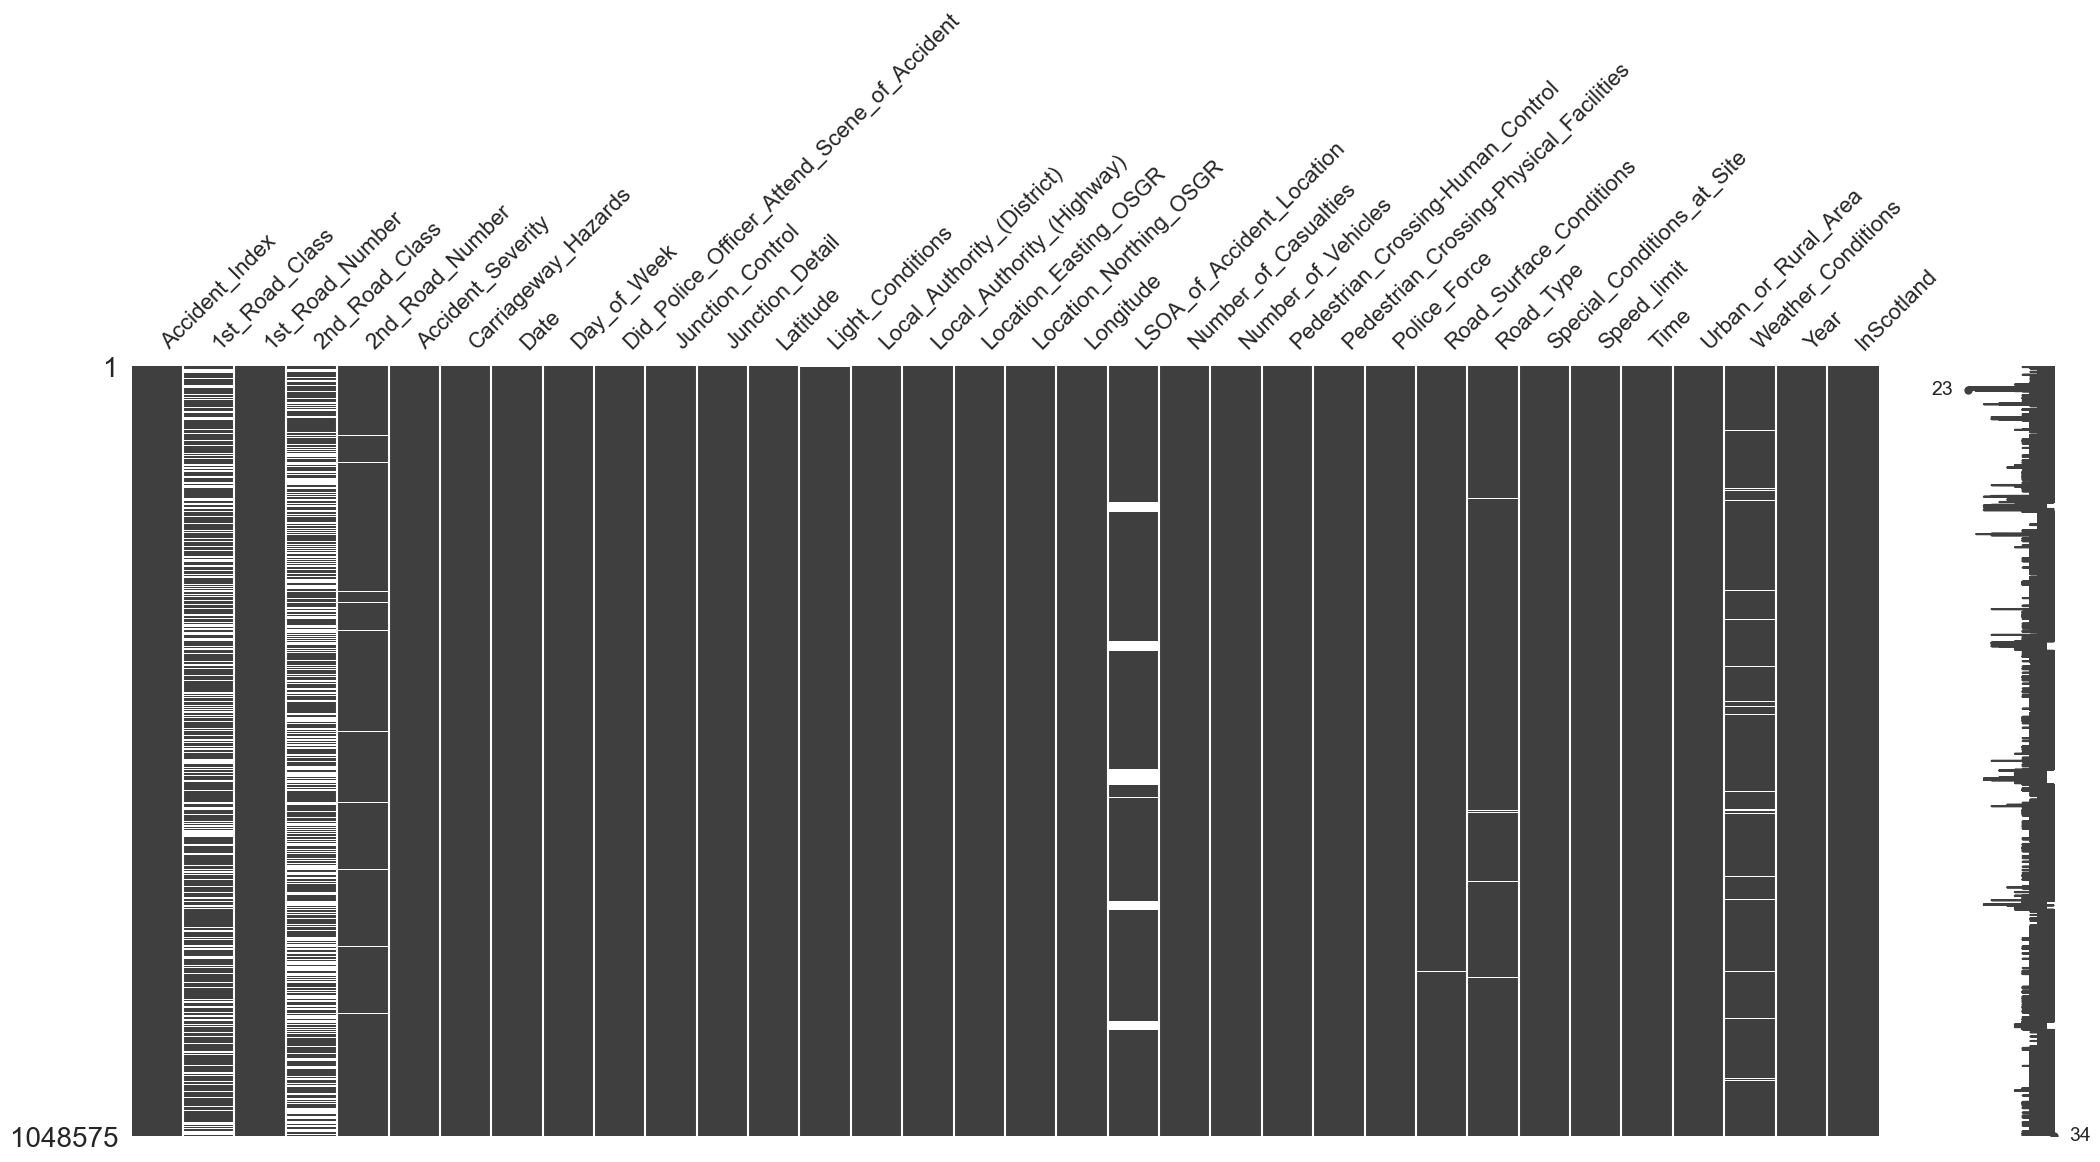

In [205]:
msno.matrix(df_accident)

In [206]:
df_accident.isnull().sum().sort_values(ascending=False)

2nd_Road_Class                                 439824
1st_Road_Class                                 305589
LSOA_of_Accident_Location                       71890
Weather_Conditions                              21392
2nd_Road_Number                                 10803
Road_Type                                        7266
Light_Conditions                                 2084
Road_Surface_Conditions                          1189
Did_Police_Officer_Attend_Scene_of_Accident       269
Longitude                                         112
Location_Northing_OSGR                            111
Location_Easting_OSGR                             111
Latitude                                          111
Time                                              100
Urban_or_Rural_Area                                85
InScotland                                         43
Pedestrian_Crossing-Physical_Facilities            37
Carriageway_Hazards                                29
Pedestrian_Crossing-Human_Co

In [207]:
print('We have a total of:', sum(df_accident.isnull().sum().sort_values(ascending=False)), 'missing values.')

We have a total of: 861084 missing values.


We have a lot of missing or NaN data (861,084). We will need to take a good look to see what is going on.  
  
We will start with the columns (features).

### Dropping Columns

Before we look at missing row data, data types and errors lets investigate the features and take out what we do not need.  
  
Lets highlight the columns we can drop and the reasons behind our decision:  
- LSOA_of_Accident_Location - As this is for statistical purposes it is not needed.
- 2nd_Road_Number - Not needed as we have the class of the road and the geographical location.
- Did_Police_Officer_Attend_Scene_of_Accident - This happened after the event.
- Location_Northing_OSGR - Secoundary geographical locator.
- Location_Easting_OSGR  - Secoundary geographical locator.
- InScotland - Not needed as we have geolocation and Local Authority information.
- 1st_Road_Number - Not needed as we have the class of the road and the geographical location.
- Local_Authority_(Highway) - Not needed as we have Local_Authority_(District) .
- Accident_Index - Not required at this stage, can be added back later if required.  
  
Lets remove these columns.

In [208]:
df_accident.drop(['Accident_Index',
                  'Location_Northing_OSGR',
                  'Location_Easting_OSGR',
                  'LSOA_of_Accident_Location',
                  '1st_Road_Number',
                  '2nd_Road_Number',
                  'Did_Police_Officer_Attend_Scene_of_Accident',
                  'Local_Authority_(Highway)',
                  'InScotland'
                  ], axis=1, inplace=True
                 )

In [209]:
df_accident.sample(n=1)

,1st_Road_Class,2nd_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
985427,C,A,Slight,None,23/08/2010,Monday,Give way or uncontrolled,T or staggered junction,52.755903,Daylight,South Holland,0.223956,2,2,0.0,0.0,Lincolnshire,Dry,Single carriageway,None,60,11:13,Rural,Fine no high winds,2010


In [210]:
df_accident.shape

(1048575, 25)

In [211]:
print('We now have a total of:', sum(df_accident.isnull().sum().sort_values(ascending=False)), 'missing values.')

We now have a total of: 777855 missing values.


Lets take a look at the columns with the most missing data.
| Column Name         | Count        |
| --------------------|--------------|
| 2nd_Road_Class      | 439824       |
| 1st_Road_Class      | 305589       |
| Weather_Conditions  | 21392    |

### 2nd_Road_Class

In [212]:
df_accident['2nd_Road_Class'].value_counts(dropna=False, ascending=False)

None            439824
Unclassified    411064
A               102148
C                47542
B                40221
Motorway          6980
A(M)               796
Name: 2nd_Road_Class, dtype: int64

#### 1st_Road_Class

In [213]:
df_accident['1st_Road_Class'].value_counts(dropna=False, ascending=False)

A           470854
None        305589
B           133179
C            93983
Motorway     42297
A(M)          2673
Name: 1st_Road_Class, dtype: int64

After investigating `1st_` and `2nd_Road_Class` features we found that in the Police form it shows us that there is two options which are very similar:  
  
- `Not Known`
- `Unclassified`
  
`Not Known` would indicate that the Police Officer does not know the road classification.  
`Unclassified` relates to a road of no classification, a side road or housing estate road.  
It would be logical to believe that there must be a `1st_Road_Class`, therefore the  
`1st_Road_Class`, `None`, value represents an `Unclassified` road or a `Not Known` road.  
  
The `2nd_Road_Class`, `None`, value represents that only one road was involved.
  
Lets replace the values in `1st_Road_Class` with `Unclassified` and `2nd_Road_Class` with `No 2nd Road`  

In [214]:
df_accident['2nd_Road_Class'].replace(np.NaN, 'No 2nd Road', inplace=True)
df_accident['2nd_Road_Class'].value_counts(dropna=False, ascending=False)

No 2nd Road     439824
Unclassified    411064
A               102148
C                47542
B                40221
Motorway          6980
A(M)               796
Name: 2nd_Road_Class, dtype: int64

In [215]:
df_accident['1st_Road_Class'].replace(np.NaN, 'Unclassified', inplace=True)
df_accident['1st_Road_Class'].value_counts(dropna=False, ascending=False)

A               470854
Unclassified    305589
B               133179
C                93983
Motorway         42297
A(M)              2673
Name: 1st_Road_Class, dtype: int64

We will change `Weather_Conditions` NaN values with the mode.  
  
Lets have a quick check of the feature attribute counts, to compare after the change.

In [216]:
df_accident['Weather_Conditions'].value_counts(dropna=False, ascending=False)

Fine no high winds       831083
Raining no high winds    125484
Other                     26486
None                      21392
Raining + high winds      14697
Fine + high winds         13554
Snowing no high winds      8542
Fog or mist                6051
Snowing + high winds       1286
Name: Weather_Conditions, dtype: int64

In [217]:
df_accident['Weather_Conditions'].fillna(df_accident['Weather_Conditions'].mode()[0], inplace=True)
df_accident['Weather_Conditions'].value_counts(dropna=False, ascending=False)

Fine no high winds       852475
Raining no high winds    125484
Other                     26486
Raining + high winds      14697
Fine + high winds         13554
Snowing no high winds      8542
Fog or mist                6051
Snowing + high winds       1286
Name: Weather_Conditions, dtype: int64

We have not made any significant change using `mode`.  
  
Lets have a quick check of the data to see how we have effected the shape.

In [218]:
df_accident.shape

(1048575, 25)

In [219]:
print('We now have a total of:', sum(df_accident.isnull().sum().sort_values(ascending=False)), 'missing values.')

We now have a total of: 11050 missing values.


So far we have lost no rows and reduced the missing value count down to 11,050.  
We will drop the rows containing the left over NaN values.

In [220]:
df_drop = pd.DataFrame(df_accident).dropna()
lnth = round(100 - ((len(df_drop) / len(df_accident) * 100)), 2)
print(f'We have dropped only', lnth, '% of the data.')

We have dropped only 1.03 % of the data.


We have only lost 1.03% of the original data (This percentage does not include the dropped columns, only rows)

In [221]:
df_accident = df_drop

Lets confirm we have no missing values.

In [222]:
print('We now have a total of:', sum(df_accident.isnull().sum().sort_values(ascending=False)), 'missing values.')

We now have a total of: 0 missing values.


<AxesSubplot: >

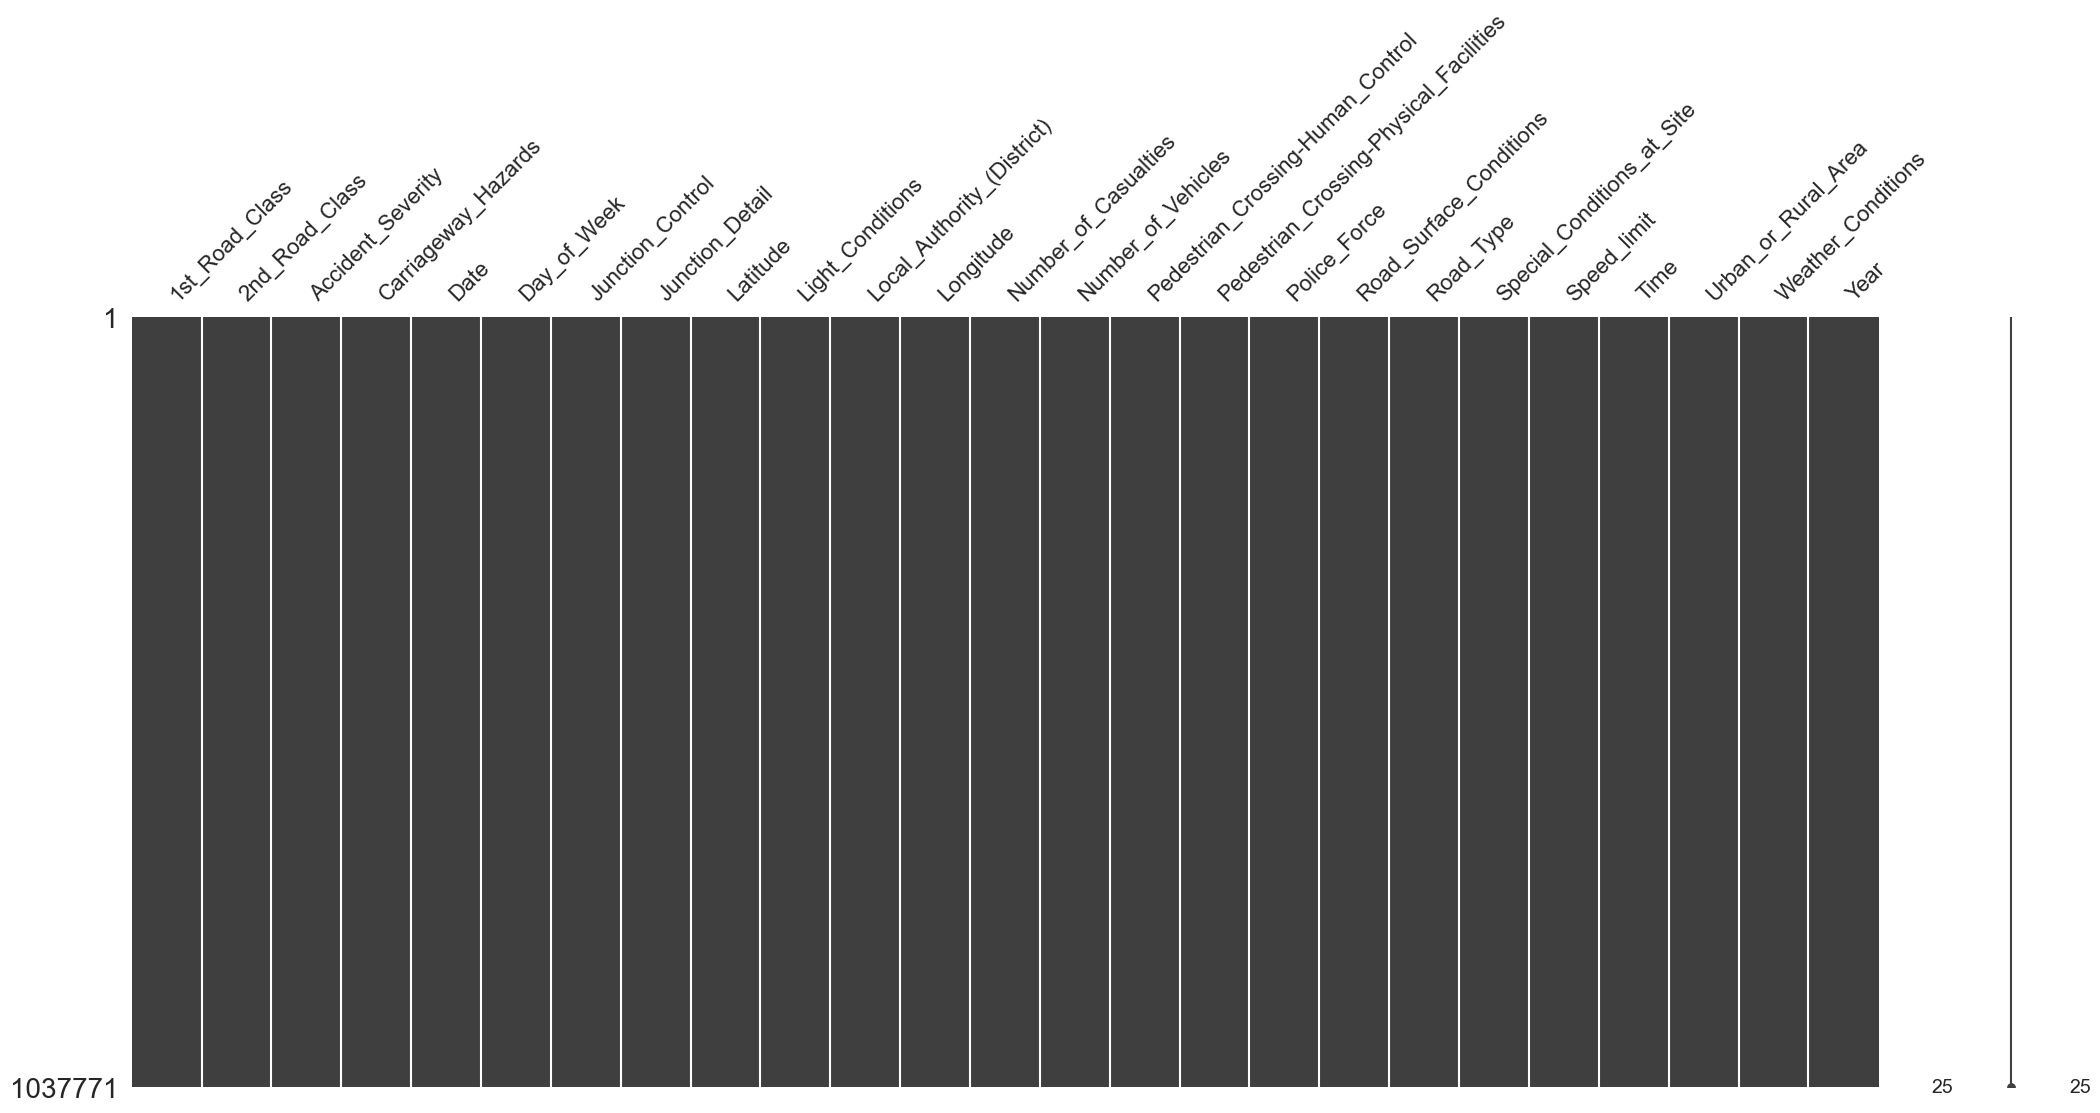

In [223]:
msno.matrix(df_accident)

### Duplicates
Lets check for and remove any duplicate rows.

In [224]:
# Number of duplicated rows
print(f'Number of duplicated rows:', df_accident.duplicated().sum())
print(f'Rows and columns:', df_accident.shape)

Number of duplicated rows: 18
Rows and columns: (1037771, 25)


In [225]:
# drop duplicated rows and reset index
df_accident.drop_duplicates(inplace=True)
df_accident.reset_index(inplace=True, drop=True)
print(f'Number of duplicated rows:', df_accident.duplicated().sum())
print(f'Rows and columns:', df_accident.shape)

Number of duplicated rows: 0
Rows and columns: (1037753, 25)


## Features

Lets remind ourselves of our features.

In [226]:
df_accident.columns

Index(['1st_Road_Class', '2nd_Road_Class', 'Accident_Severity',
       'Carriageway_Hazards', 'Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year'],
      dtype='object')

Lets look at the data types and formatting a little closer.  
  
We will convert all column names to lowercase for standardisation, and remove white space if any.

In [227]:
df_accident.columns= df_accident.columns.str.strip().str.lower()
df_accident.columns

Index(['1st_road_class', '2nd_road_class', 'accident_severity',
       'carriageway_hazards', 'date', 'day_of_week', 'junction_control',
       'junction_detail', 'latitude', 'light_conditions',
       'local_authority_(district)', 'longitude', 'number_of_casualties',
       'number_of_vehicles', 'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'police_force',
       'road_surface_conditions', 'road_type', 'special_conditions_at_site',
       'speed_limit', 'time', 'urban_or_rural_area', 'weather_conditions',
       'year'],
      dtype='object')

Now we can check datatypes.

In [228]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037753 entries, 0 to 1037752
Data columns (total 25 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   1st_road_class                           1037753 non-null  object 
 1   2nd_road_class                           1037753 non-null  object 
 2   accident_severity                        1037753 non-null  object 
 3   carriageway_hazards                      1037753 non-null  object 
 4   date                                     1037753 non-null  object 
 5   day_of_week                              1037753 non-null  object 
 6   junction_control                         1037753 non-null  object 
 7   junction_detail                          1037753 non-null  object 
 8   latitude                                 1037753 non-null  float64
 9   light_conditions                         1037753 non-null  object 
 10  local_authority_(d

Lets take a sample row and have a look at each feature in more detail.  

In [229]:
df_accident.head(1)

,1st_road_class,2nd_road_class,accident_severity,carriageway_hazards,date,day_of_week,junction_control,junction_detail,latitude,light_conditions,local_authority_(district),longitude,number_of_casualties,number_of_vehicles,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,police_force,road_surface_conditions,road_type,special_conditions_at_site,speed_limit,time,urban_or_rural_area,weather_conditions,year
0,B,C,Slight,None,05/01/2005,Wednesday,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,-0.211708,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005


Lets convert all the categorical data to `category`, the date to `datetime` and all the numbers to `int` and `float`.

In [230]:
for col in ['1st_road_class', '2nd_road_class',
            'accident_severity', 'carriageway_hazards',
            'junction_control', 'junction_detail',
            'light_conditions', 'local_authority_(district)',
            'pedestrian_crossing-human_control',
            'pedestrian_crossing-physical_facilities',
            'police_force', 'road_surface_conditions',
            'road_type', 'special_conditions_at_site',
            'urban_or_rural_area', 'weather_conditions'
            ]:
    df_accident[col] = df_accident[col].astype('category')

for col in ['number_of_casualties', 'number_of_vehicles',
            'speed_limit'
            ]:
    df_accident[col] = df_accident[col].astype('int')

for col in ['latitude', 'longitude'
            ]:
    df_accident[col] = df_accident[col].astype('float64')

df_accident['date'] = pd.to_datetime(df_accident['date'], format='%d/%m/%Y')

df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037753 entries, 0 to 1037752
Data columns (total 25 columns):
 #   Column                                   Non-Null Count    Dtype         
---  ------                                   --------------    -----         
 0   1st_road_class                           1037753 non-null  category      
 1   2nd_road_class                           1037753 non-null  category      
 2   accident_severity                        1037753 non-null  category      
 3   carriageway_hazards                      1037753 non-null  category      
 4   date                                     1037753 non-null  datetime64[ns]
 5   day_of_week                              1037753 non-null  object        
 6   junction_control                         1037753 non-null  category      
 7   junction_detail                          1037753 non-null  category      
 8   latitude                                 1037753 non-null  float64       
 9   light_conditi

Now things are starting to look much better. We will look at dates and times later, as we plan to make use of these columns.

#### Feature: '1st_Road_Class' and '2nd_Road_Class'

In [231]:
print(df_accident['1st_road_class'].value_counts(dropna=False, ascending=False))
print(f'Total rows: ', df_accident['1st_road_class'].count())

A               466921
Unclassified    301039
B               132195
C                92931
Motorway         42002
A(M)              2665
Name: 1st_road_class, dtype: int64
Total rows:  1037753


In [232]:
print(df_accident['2nd_road_class'].value_counts(dropna=False, ascending=False))
print(f'Total rows: ', df_accident['1st_road_class'].count())

No 2nd Road     434940
Unclassified    407293
A               100979
C                46932
B                39874
Motorway          6944
A(M)               791
Name: 2nd_road_class, dtype: int64
Total rows:  1037753


We can see that most accidents happen on **'A Roads'** and **'Unclassified Roads'**. Nearly half of all accidents do not involve a **second road**.

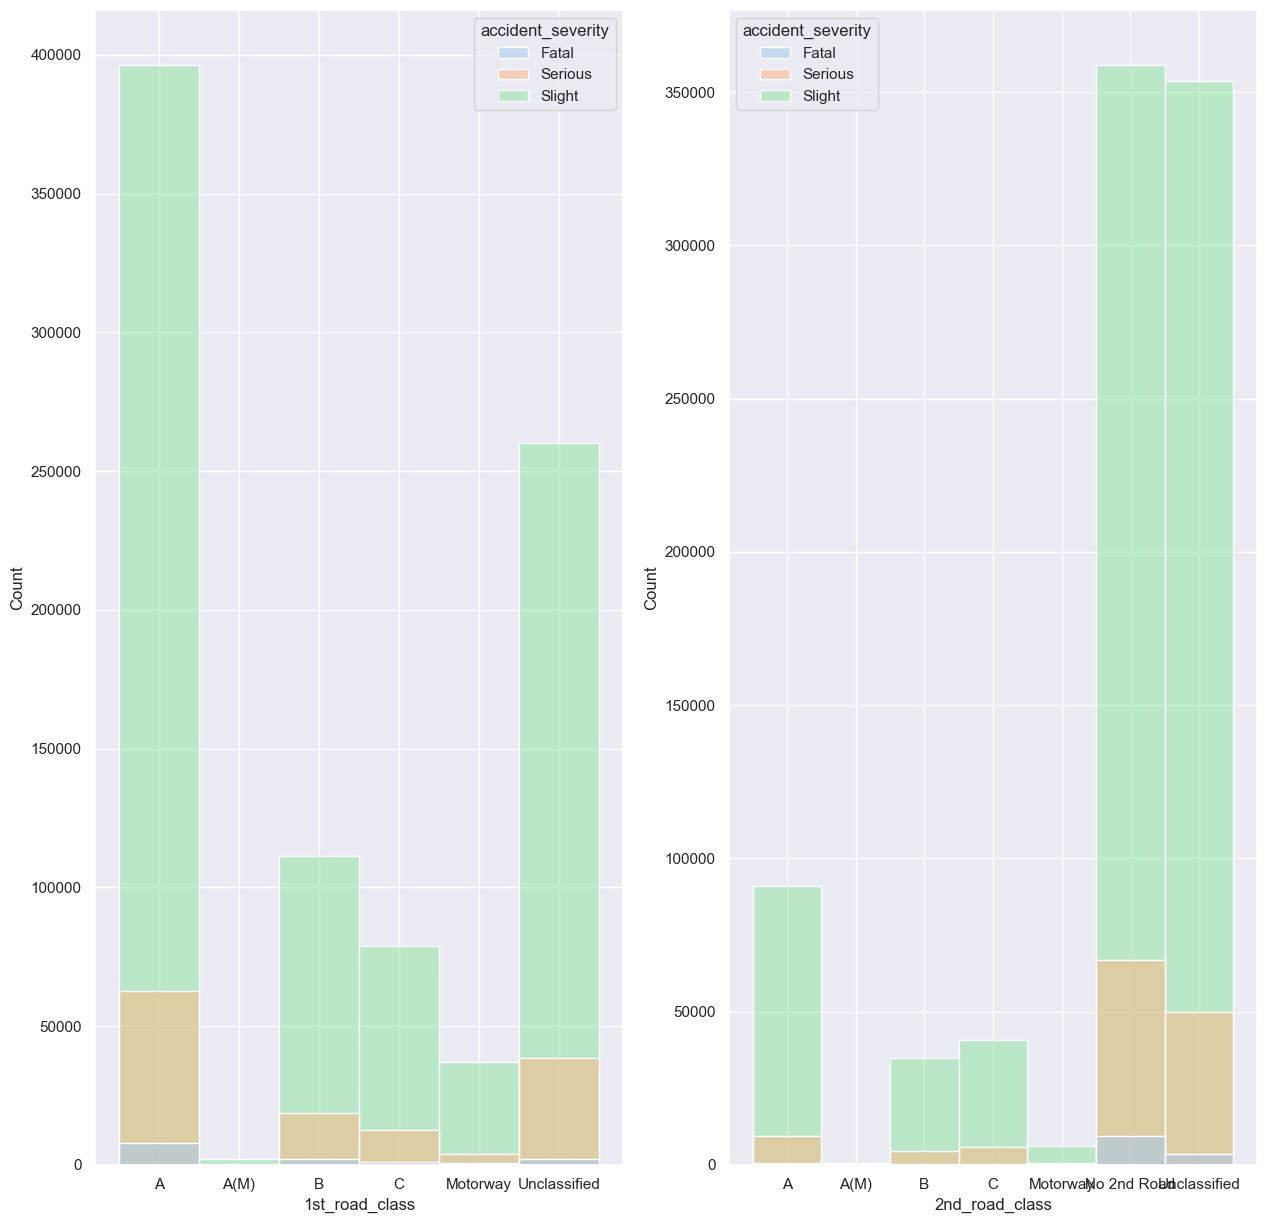

In [233]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

sns.histplot(data=df_accident,
             x='1st_road_class',
             hue='accident_severity',
             ax=ax[0]
             )
sns.histplot(data=df_accident,
             x='2nd_road_class',
             hue='accident_severity',
             ax=ax[1]
             )

plt.show()

From the graphs we can detect that most fatal accidents happen on either an **'A' Road only**, or an **'A' Road with an 'Unclassified' 2nd Road (pulling out of, or into a side road)**.

#### Feature - 'Accident_Severity'

In [234]:
print(df_accident['accident_severity'].value_counts(dropna=False, ascending=False))
print(f'\n Total rows: ', df_accident['accident_severity'].count())

Slight     886277
Serious    137039
Fatal       14437
Name: accident_severity, dtype: int64

 Total rows:  1037753


We can see that most accidents are **'Slight'** accidents with **'Fatal'** the lowest.

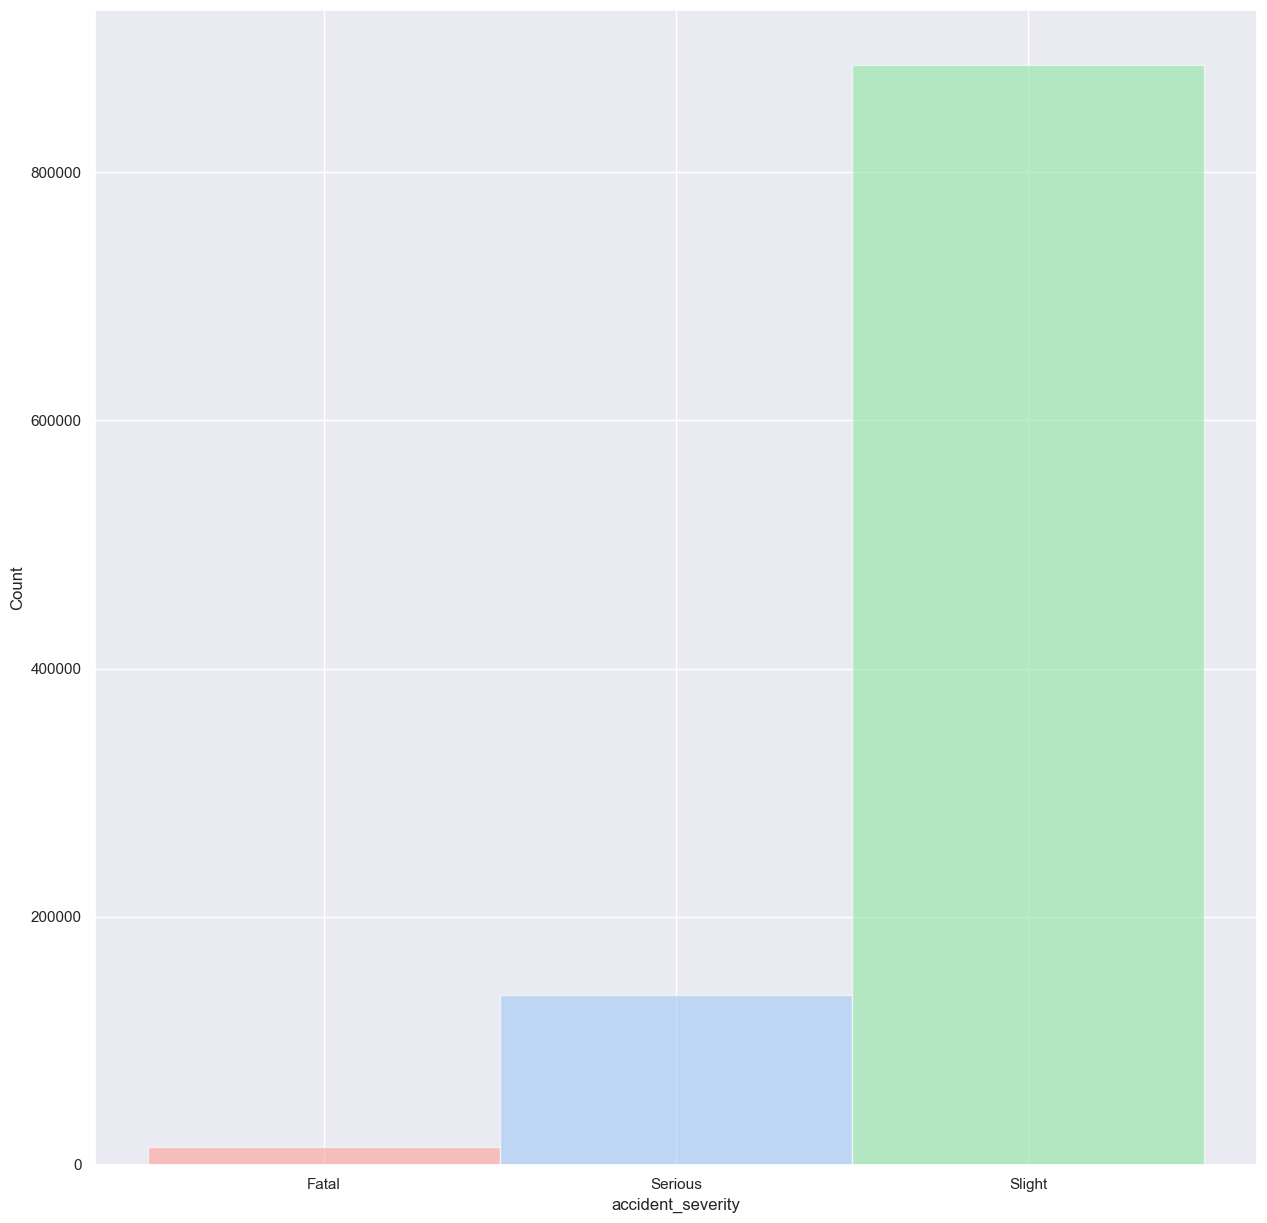

In [235]:
plt.figure(figsize=(15,15))

ax = sns.histplot(data=df_accident, x='accident_severity')
ax.patches[0].set_alpha(0.6), ax.patches[2].set_facecolor('g')
ax.patches[1].set_alpha(0.6), ax.patches[1].set_facecolor('b')
ax.patches[2].set_alpha(0.6), ax.patches[0].set_facecolor('r')

plt.show()

#### Feature - Carriageway_Hazards

In [236]:
print(df_accident['carriageway_hazards'].value_counts(dropna=False, ascending=False))
print(f'\n Total rows: ', df_accident['carriageway_hazards'].count())

None                                               1018267
Other object on road                                  8844
Any animal in carriageway (except ridden horse)       5585
Pedestrian in carriageway - not injured               2218
Previous accident                                     1716
Vehicle load on road                                  1123
Name: carriageway_hazards, dtype: int64

 Total rows:  1037753


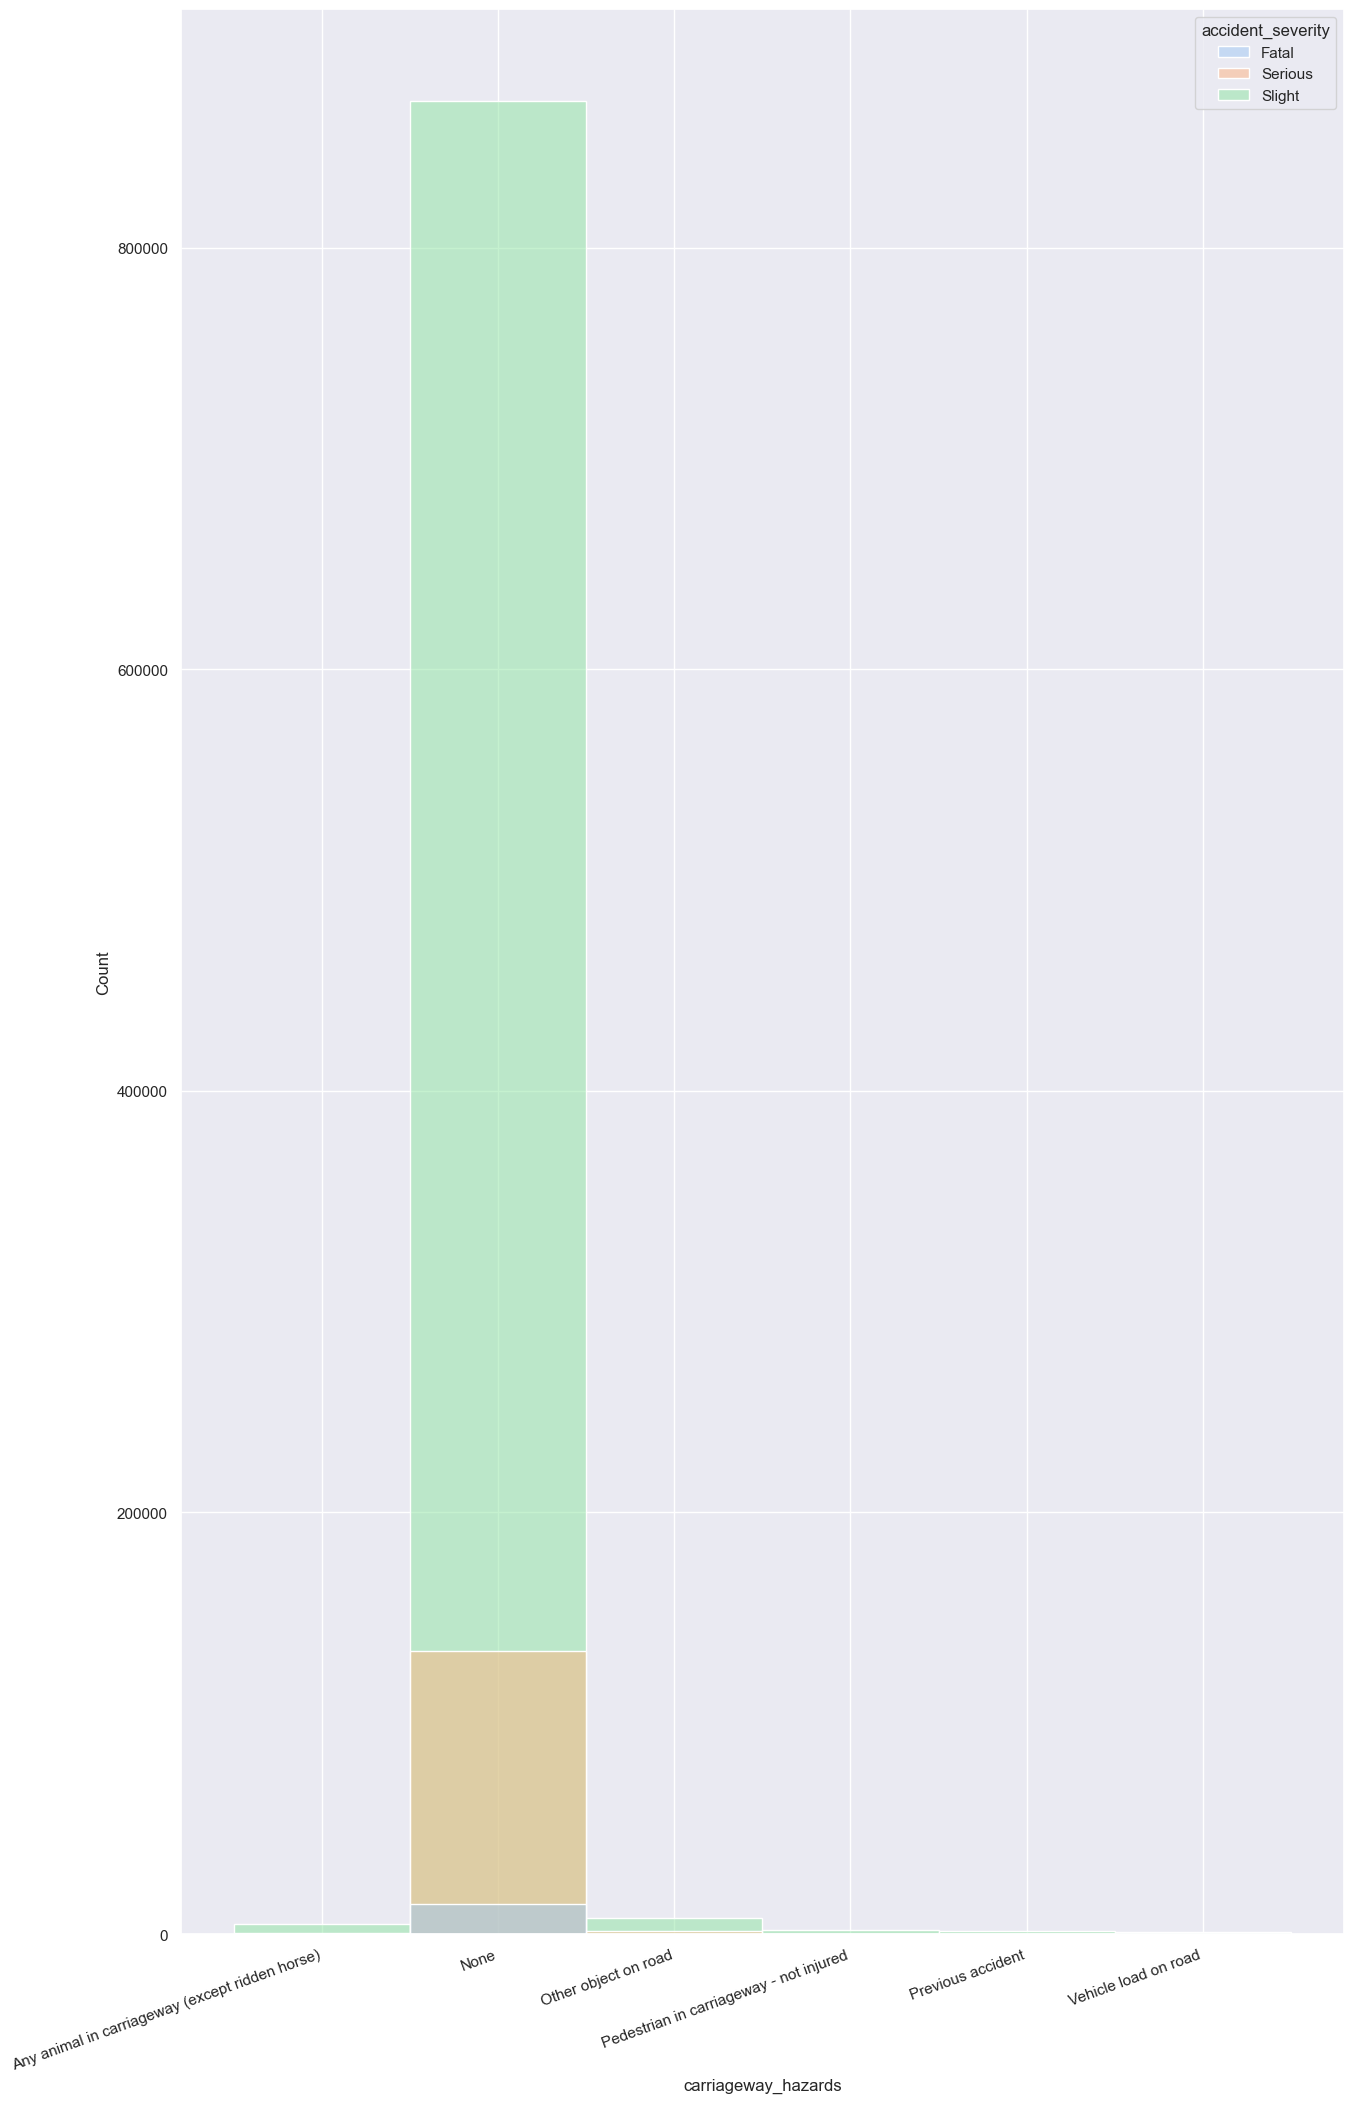

In [237]:
plt.figure(figsize=(15,25))
ax = sns.histplot(data=df_accident,
                  x='carriageway_hazards',
                  hue='accident_severity'
                  )
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=20,
                   horizontalalignment='right'
                   )
None

plt.show()

We can see that most accidents happen when there are no carriageway hazards.  
Lets take a look at each carriageway hazard to see if we can uncover anything.

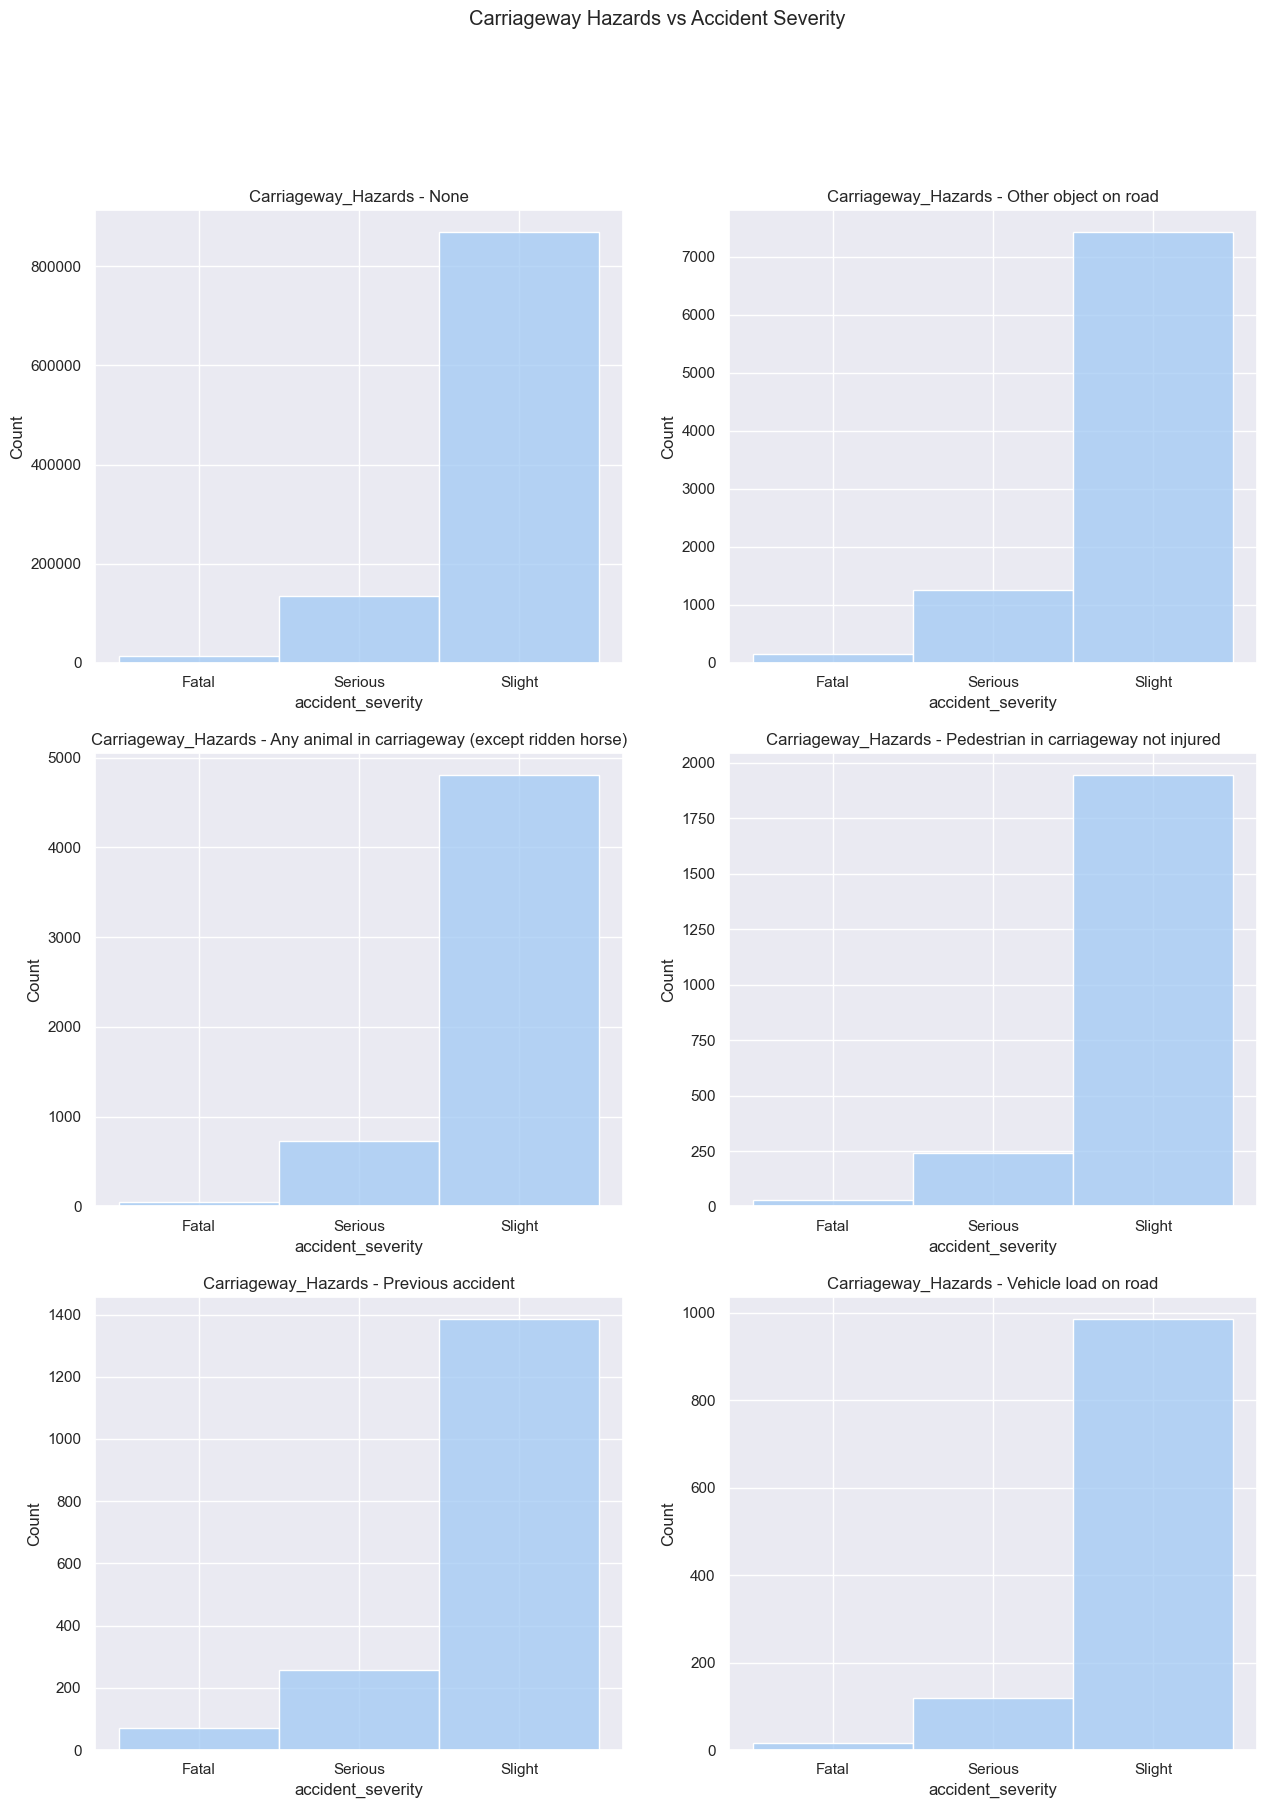

In [238]:
fig, axs = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Carriageway Hazards vs Accident Severity')

sns.histplot(
    data=df_accident[df_accident['carriageway_hazards'] == 'None'], ax=axs[0, 0],
    x='accident_severity',
    palette='pastel',
              ).set(title='Carriageway_Hazards - None')
sns.histplot(
    data=df_accident[df_accident['carriageway_hazards'] == 'Other object on road'], ax=axs[0, 1],
    x='accident_severity',
    palette='pastel',
              ).set(title='Carriageway_Hazards - Other object on road')
sns.histplot(
    data=df_accident[df_accident['carriageway_hazards'] == 'Any animal in carriageway (except ridden horse)'], ax=axs[1, 0],
    x='accident_severity',
    palette='pastel',
              ).set(title='Carriageway_Hazards - Any animal in carriageway (except ridden horse)')
sns.histplot(
    data=df_accident[df_accident['carriageway_hazards'] == 'Pedestrian in carriageway - not injured'], ax=axs[1, 1],
    x='accident_severity',
    palette='pastel',
              ).set(title='Carriageway_Hazards - Pedestrian in carriageway not injured')
sns.histplot(
    data=df_accident[df_accident['carriageway_hazards'] == 'Previous accident'], ax=axs[2, 0],
    x='accident_severity',
    palette='pastel',
              ).set(title='Carriageway_Hazards - Previous accident')
sns.histplot(
    data=df_accident[df_accident['carriageway_hazards'] == 'Vehicle load on road'], ax=axs[2, 1],
    x='accident_severity',
    palette='pastel',
              ).set(title='Carriageway_Hazards - Vehicle load on road')

plt.show()

We can see here from the visualisations that the severity of an accident rises when there is both an object on the road and when there is a previous accident.  
Fatal accidents are more likely to happen when there is a previous accident.

In [262]:
df_accident.groupby(['carriageway_hazards', 'accident_severity']).size()

carriageway_hazards                              accident_severity
Any animal in carriageway (except ridden horse)  Fatal                    47
                                                 Serious                 731
                                                 Slight                 4807
None                                             Fatal                 14114
                                                 Serious              134438
                                                 Slight               869715
Other object on road                             Fatal                   156
                                                 Serious                1252
                                                 Slight                 7436
Pedestrian in carriageway - not injured          Fatal                    31
                                                 Serious                 242
                                                 Slight                 1945
Previous 

### Feature - Date and Time

#### Date, Month and Season
  
Lets take a look at the data type of the `Date` column.

In [240]:
print(f"Data type of Date Column: {df_accident['date'].dtype}")

Data type of Date Column: datetime64[ns]


We can see from the graphs that Friday's have the highest rates of RTC's with the exception of `Fatal` accidents, which peak on Saturday's.  
  
Let's take a look at times of day, first we will need to check the data type of out `Time` feature.  
We will convert to hours to block the times so we can produce a simpler graph.

In [248]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037753 entries, 518876 to 1037752
Data columns (total 27 columns):
 #   Column                                   Non-Null Count    Dtype         
---  ------                                   --------------    -----         
 0   1st_road_class                           1037753 non-null  category      
 1   2nd_road_class                           1037753 non-null  category      
 2   accident_severity                        1037753 non-null  category      
 3   carriageway_hazards                      1037753 non-null  category      
 4   date                                     1037753 non-null  datetime64[ns]
 5   day_of_week                              1037753 non-null  category      
 6   junction_control                         1037753 non-null  category      
 7   junction_detail                          1037753 non-null  category      
 8   latitude                                 1037753 non-null  float64       
 9   light_co

In [249]:
df_accident["time"] =  pd.to_datetime(df_accident["time"], format="%H:%M")
df_accident["time"].dtype

dtype('<M8[ns]')

In [250]:
df_accident.shape

(1037753, 27)

In [251]:
df_accident["hour"] = df_accident["time"].apply(lambda x:x.hour)
# df_accident.drop("time", axis=1, inplace=True)
df_accident.shape

(1037753, 28)

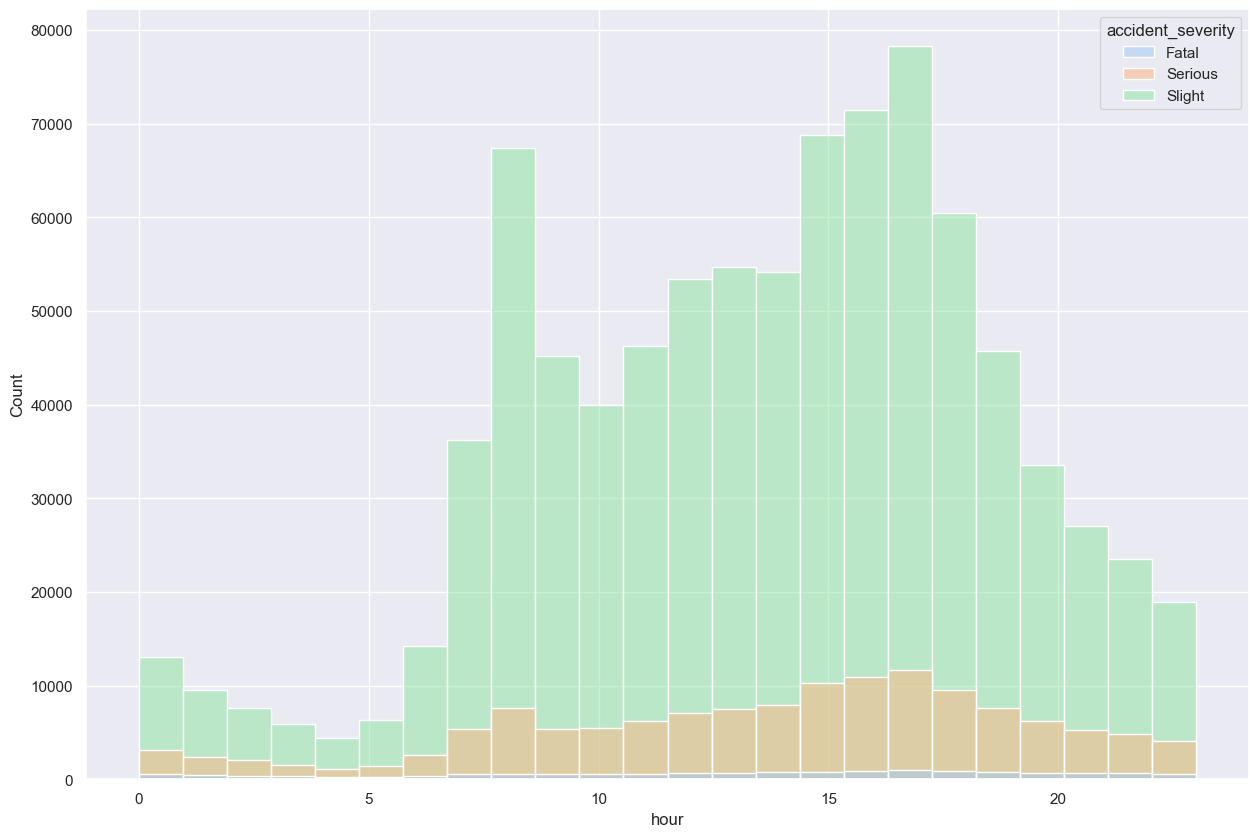

In [252]:
plt.figure(figsize=(15,10))
ax = sns.histplot(data=df_accident, x='hour', palette='pastel', bins=24, hue='accident_severity')

plt.show()

We can see two peaks, one in the morning and one in the afternoon.  
Lets take a look at the severities.

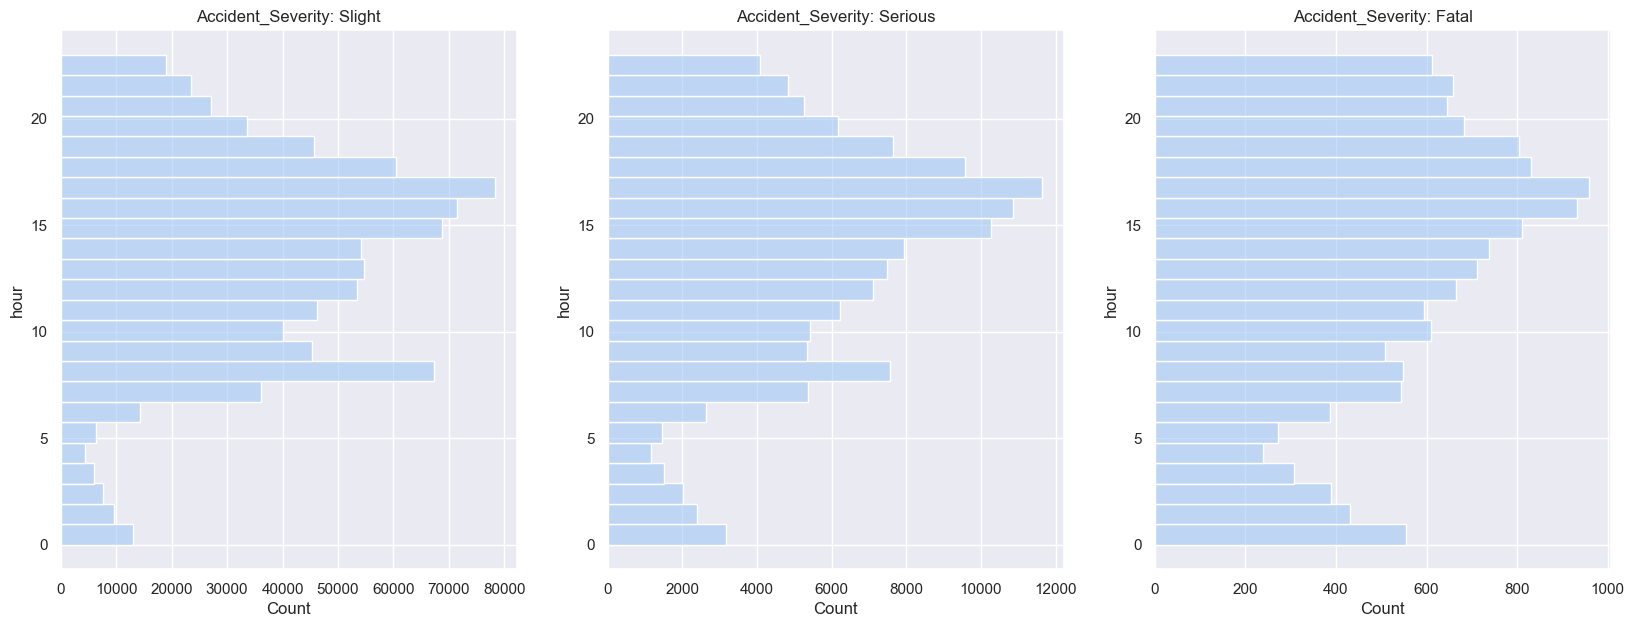

In [253]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='hour',
             alpha=0.6, bins=24, ax=ax[0]
             ).set(title=f'Accident_Severity: Slight')

sns.histplot(df_accident[df_accident['accident_severity'] == 'Serious'],
             y='hour',
             alpha=0.6, bins=24, ax=ax[1]
             ).set(title=f'Accident_Severity: Serious')

sns.histplot(df_accident[df_accident['accident_severity'] == 'Fatal'],
             y="hour",
             alpha=0.6, bins=24, ax=ax[2]
             ).set(title=f'Accident_Severity: Fatal')

plt.show()

We can see most RTC's happen betwen 8am and 7pm, with two peaks.  
- For Slight and Serious we have peaks at 9am and 6pm. This would appear to be rush hour traffic.
- For `Fatal` we have a peak at 6pm  

Fatal accidents to appear to maintain a higher level until midnight, where it then starts to tail off.

#### Feature - `day_of_week`
Lets create two new columns, `day` and `month`.  
  
This will create two new features, `day` and `month`.

In [241]:
df_accident["day"] = df_accident["date"].apply(lambda x:x.day)
df_accident["month"] = df_accident["date"].apply(lambda x:x.month)
df_accident.shape

(1037753, 27)

Here we can look to see what week day trends we have.

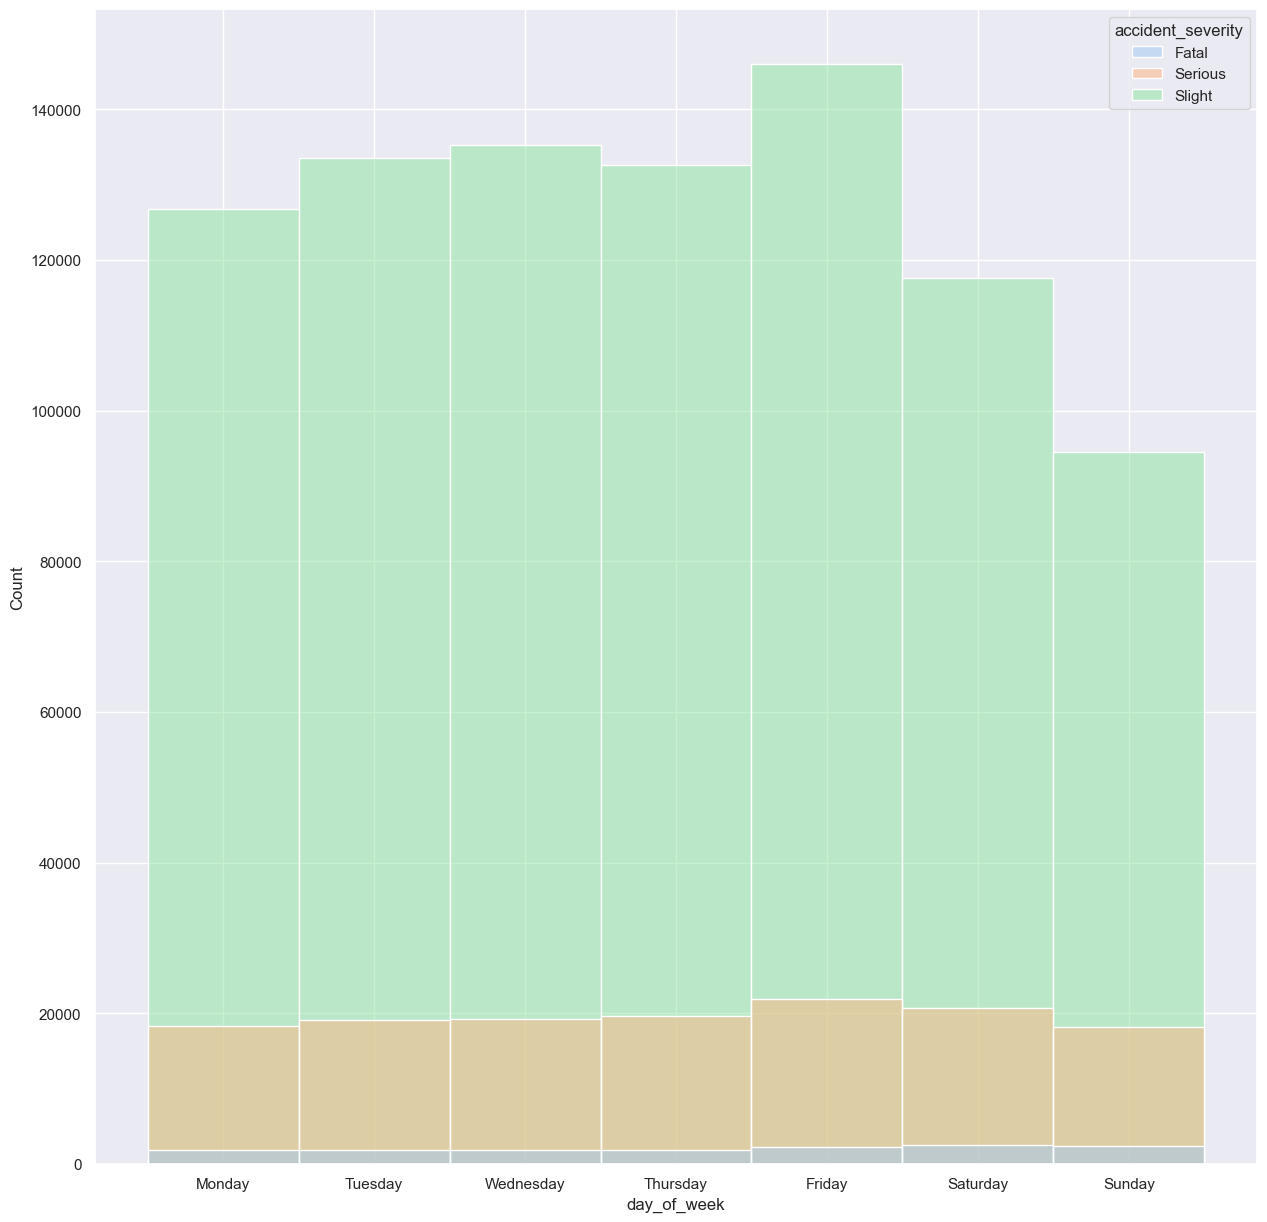

In [246]:
df_accident.day_of_week = pd.Categorical(values=df_accident.day_of_week,
                                    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                                    ) # Set the order for the column.
df_accident.sort_values(['day_of_week'], inplace=True) # Sort the column.

plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='day_of_week', palette='pastel', bins=7, hue='accident_severity')

plt.show()

There is a definite increase in accidents on Friday's.  
Lets have a look at the severity on each day.

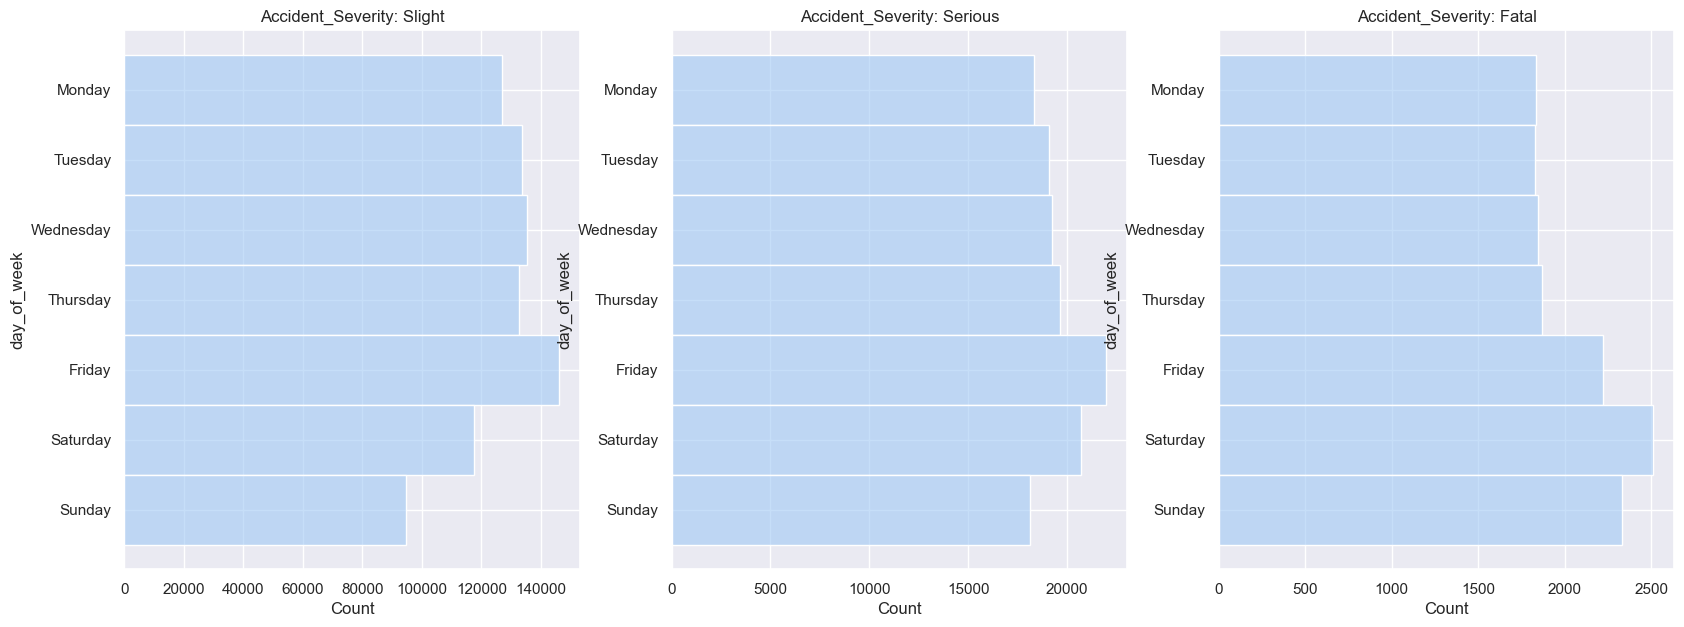

In [247]:
df_accident.day_of_week = pd.Categorical(values=df_accident.day_of_week,
                                    categories=['Monday', 'Tuesday',
                                                'Wednesday', 'Thursday',
                                                'Friday', 'Saturday',
                                                'Sunday'
                                                ]
                                         ) # Set the order for the column
df_accident.sort_values(['day_of_week'], inplace=True) # Sort the column

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='day_of_week',
             alpha=0.6, bins=50, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident['accident_severity'] == 'Serious'],
             y='day_of_week',
             alpha=0.6, bins=50, ax=ax[1]
             ).set(title=f'Accident_Severity: Serious')

sns.histplot(df_accident[df_accident['accident_severity'] == 'Fatal'],
             y='day_of_week',
             alpha=0.6, bins=50, ax=ax[2]
             ).set(title=f'Accident_Severity: Fatal')

plt.show()

#### New Feature - `day`
Here we can have a look at the day of the month to see what trends we may have.

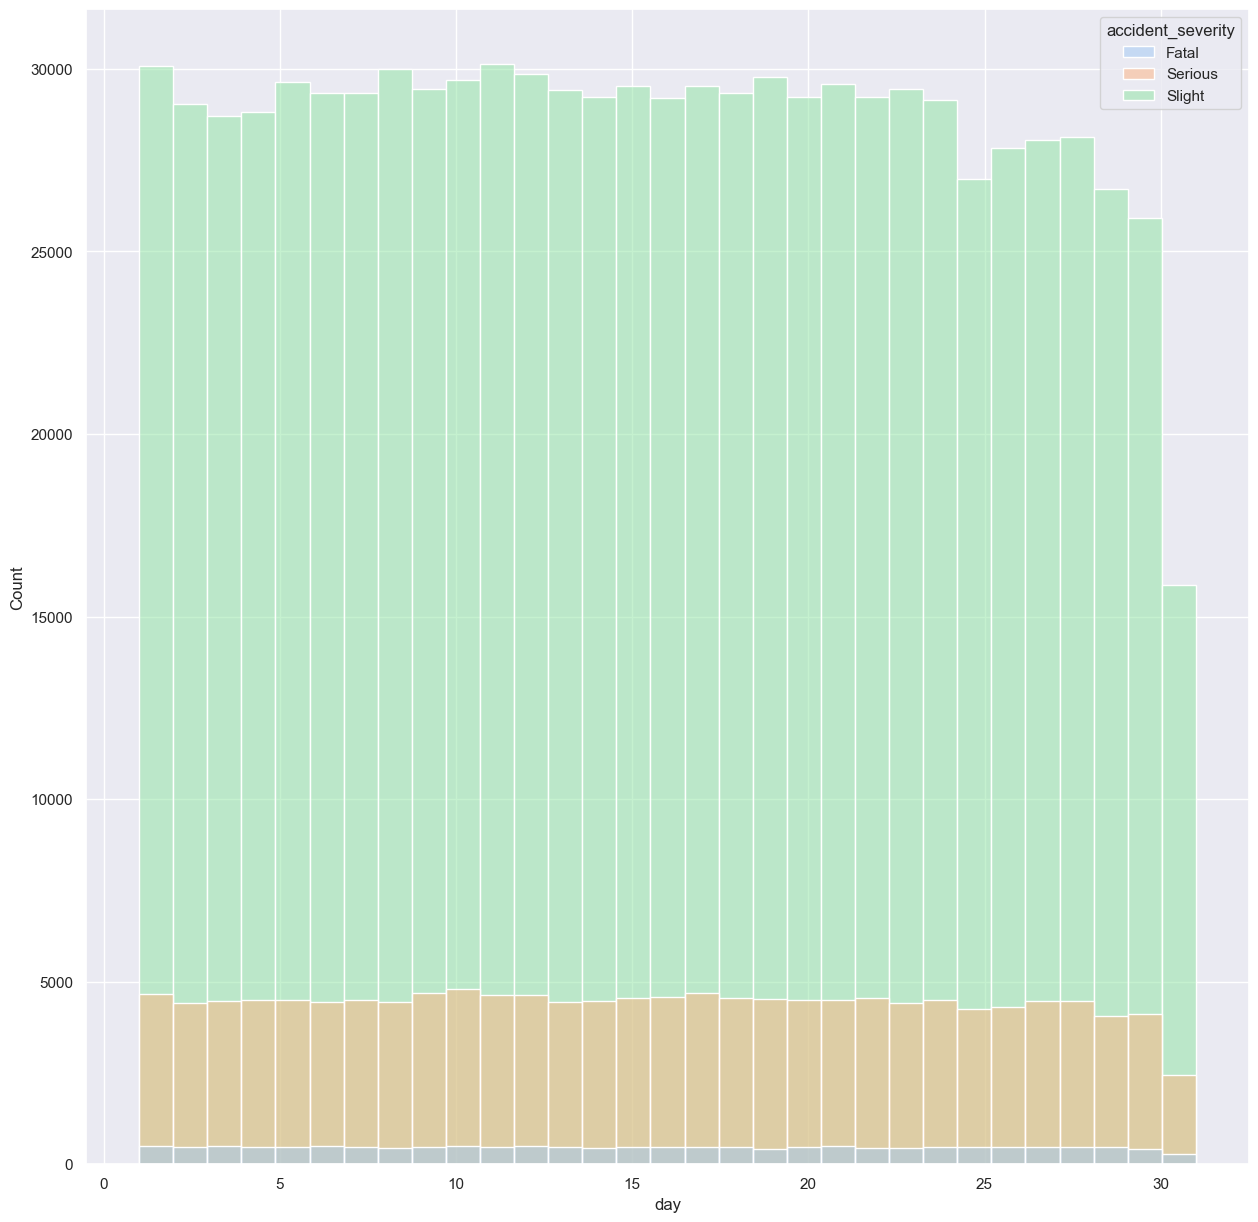

In [254]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='day', palette='pastel', bins=31, hue='accident_severity')

plt.show()

#### New Feature - `month`

Lets check correlations against `month`.

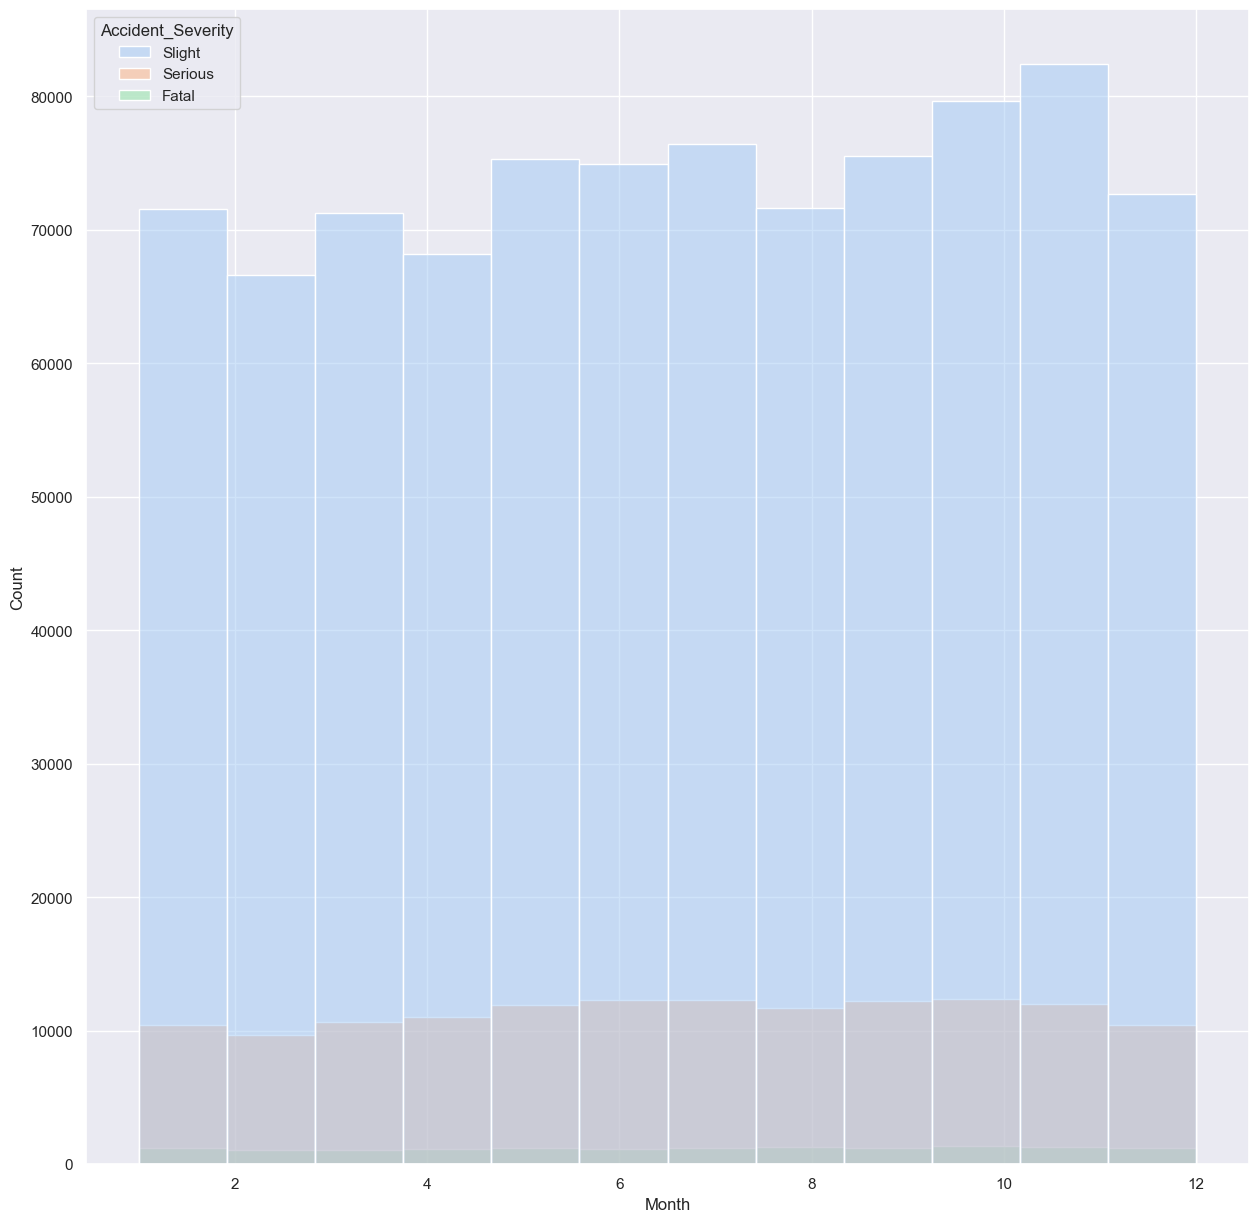

In [40]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='Month', palette='pastel', bins=12, hue='Accident_Severity')

plt.show()

We can see a slight curverture, lets try and explore what is happening.  
  
Lets create a new column `season` with attributes, `Spring, Summer, Autumn, and Winter` to see if we can reveal a trend.

#### New Feature - `season`

In [257]:
df_accident["season"] = df_accident["month"].map({3: "Spring", 4: "Spring",
                                                  5: "Spring", 6: "Summer",
                                                  7: "Summer", 8: "Summer",
                                                  9: "Autumn", 10: "Autumn",
                                                  11: "Autumn", 12: "Winter",
                                                  1: "Winter", 2: "Winter"}
                                                 )
df_accident.shape

(1037753, 29)

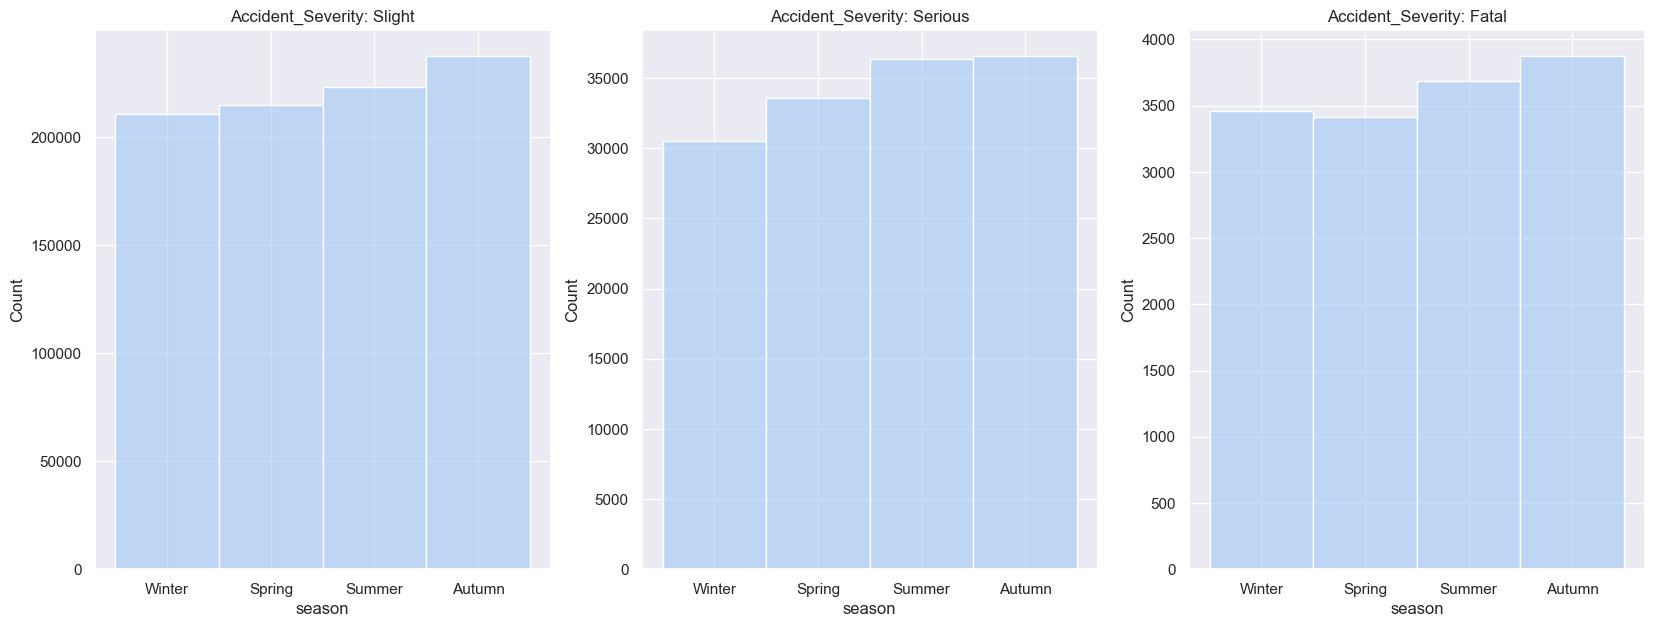

In [258]:
df_accident.season = pd.Categorical(values=df_accident.season,
                                    categories=['Winter', 'Spring', 'Summer', 'Autumn']
                                    ) # Set the order for the column as you want
df_accident.sort_values(['season'], inplace=True) # Sort the column

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             x='season',
             alpha=0.6, bins=50, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             x='season',
             alpha=0.6, bins=50, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             x='season',
             alpha=0.6, bins=50, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()  ## and plot

We can see by graphing the data that there is a subtle increase of the severity of an RTC drawing towards Autumn.  
Fatal accidents do have a slight elevation during the summer months.

In [263]:
df_accident.groupby(['season', 'accident_severity']).size()

season  accident_severity
Winter  Fatal                  3463
        Serious               30510
        Slight               210852
Spring  Fatal                  3412
        Serious               33608
        Slight               214804
Summer  Fatal                  3686
        Serious               36350
        Slight               223006
Autumn  Fatal                  3876
        Serious               36571
        Slight               237615
dtype: int64

In [ ]:
bank_holidays_2010 = {'Easter': [pd.date_range('02/04/2010', periods=4)],
                      'Mayday': [pd.date_range('03/05/2010', periods=1)],
                      'Spring Bank Holiday': [pd.date_range('31/05/2010', periods=1)],
                      'Summer Bank Holiday': [pd.date_range('30/08/2010', periods=1)],
                      'Christmas and New Year': [pd.date_range('25/12/2010', periods=9)]
                      }
bank_holidays_2011 = {'Easter': [pd.date_range('22/04/2010', periods=4)],
                      'Royal Wedding': [pd.date_range('29/04/2010', periods=1)],
                      'Mayday': [pd.date_range('02/05/2010', periods=1)],
                      'Spring Bank Holiday': [pd.date_range('30/05/2010', periods=1)],
                      'Summer Bank Holiday': [pd.date_range('29/08/2010', periods=1)],
                      'Christmas and New Year': [pd.date_range('25/12/2010', periods=9)]
                      }
bank_holidays_2012 = {'Easter': [pd.date_range('06/04/2010', periods=4)],
                      'Mayday': [pd.date_range('07/05/2010', periods=1)],
                      'Spring Bank Holiday': [pd.date_range('04/06/2010', periods=1)],
                      'Queens Diamond Jubliee': [pd.date_range('05/06/2010', periods=1)],
                      'Summer Bank Holiday': [pd.date_range('27/08/2010', periods=1)],
                      'Christmas and New Year': [pd.date_range('25/12/2010', periods=8)]
                      }
bank_holidays_2013 = {'Easter': [pd.date_range('29/03/2010', periods=4)],
                      'Mayday': [pd.date_range('06/05/2010', periods=1)],
                      'Spring Bank Holiday': [pd.date_range('27/05/2010', periods=1)],
                      'Summer Bank Holiday': [pd.date_range('26/08/2010', periods=1)],
                      'Christmas and New Year': [pd.date_range('25/12/2010', periods=8)]
                      }
bank_holidays_2014 = {'Easter': [pd.date_range('18/04/2010', periods=4)],
                      'Mayday': [pd.date_range('05/05/2010', periods=1)],
                      'Spring Bank Holiday': [pd.date_range('26/05/2010', periods=1)],
                      'Summer Bank Holiday': [pd.date_range('25/08/2010', periods=1)],
                      'Christmas and New Year': [pd.date_range('25/12/2010', periods=8)]
                      }
bank_holidays_2015 = {'Easter': [pd.date_range('03/04/2010', periods=4)],
                      'Mayday': [pd.date_range('04/05/2010', periods=1)],
                      'Spring Bank Holiday': [pd.date_range('25/05/2010', periods=1)],
                      'Summer Bank Holiday': [pd.date_range('31/08/2010', periods=1)],
                      'Christmas and New Year': [pd.date_range('25/12/2010', periods=8)]
                      }

df_accident['bank_holidays_2010'] = bank_holidays_2010
df_accident['bank_holidays_2011'] = bank_holidays_2011
df_accident['bank_holidays_2012'] = bank_holidays_2012
df_accident['bank_holidays_2013'] = bank_holidays_2013
df_accident['bank_holidays_2014'] = bank_holidays_2014
df_accident['bank_holidays_2015'] = bank_holidays_2015

In [281]:
df_accident["bank_holidays_2010"] = df_accident["date"].map({'Easter': pd.date_range('02/04/2010', periods=4),
                      'Mayday': pd.date_range('03/05/2010', periods=1),
                      'Spring Bank Holiday': pd.date_range('31/05/2010', periods=1),
                      'Summer Bank Holiday': pd.date_range('30/08/2010', periods=1),
                      'Christmas and New Year': pd.date_range('25/12/2010', periods=9)
                      }
                                                 )
df_accident.shape

(1037753, 30)

In [282]:
df_accident.columns

Index(['1st_road_class', '2nd_road_class', 'accident_severity',
       'carriageway_hazards', 'date', 'day_of_week', 'junction_control',
       'junction_detail', 'latitude', 'light_conditions',
       'local_authority_(district)', 'longitude', 'number_of_casualties',
       'number_of_vehicles', 'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'police_force',
       'road_surface_conditions', 'road_type', 'special_conditions_at_site',
       'speed_limit', 'time', 'urban_or_rural_area', 'weather_conditions',
       'year', 'day', 'month', 'hour', 'season', 'bank_holidays_2010'],
      dtype='object')

In [284]:
df_accident.head(1)

,1st_road_class,2nd_road_class,accident_severity,carriageway_hazards,date,day_of_week,junction_control,junction_detail,latitude,light_conditions,local_authority_(district),longitude,number_of_casualties,number_of_vehicles,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,police_force,road_surface_conditions,road_type,special_conditions_at_site,speed_limit,time,urban_or_rural_area,weather_conditions,year,day,month,hour,season,bank_holidays_2010
1037752,Unclassified,Unclassified,Serious,Other object on road,2010-02-28,Sunday,Give way or uncontrolled,T or staggered junction,57.57521,Daylight,Highland,-3.895673,1,1,0.0,0.0,Northern,Wet or damp,Dual carriageway,None,60,1900-01-01 15:45:00,Rural,Snowing no high winds,2010,28,2,15,Winter,NaN


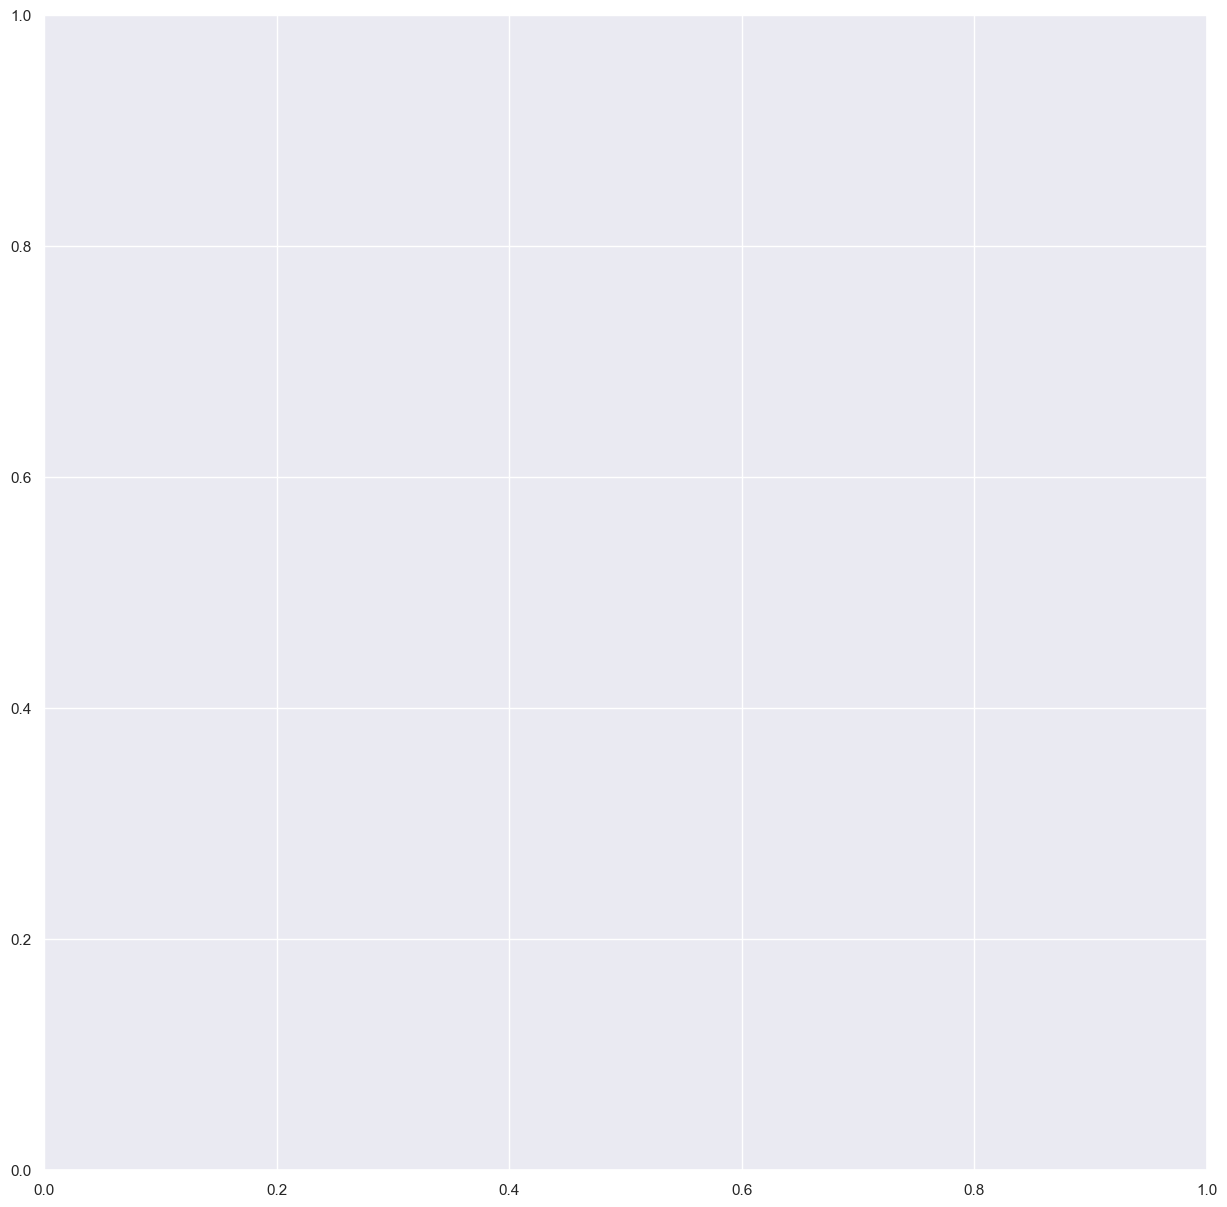

In [283]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='bank_holidays_2010', palette='pastel', bins=12, hue='accident_severity')

plt.show()

In [ ]:
pd.date_range('2022-2-7', periods=7)

### Feature - `junction_control`

Lets check the attributes and the data type.

In [264]:
df_accident['junction_control'].dtype

CategoricalDtype(categories=['Authorised person', 'Auto traffic sigl',
                  'Auto traffic signal', 'Data missing or out of range',
                  'Give way or uncontrolled',
                  'Not at junction or within 20 metres', 'Stop sign'],
, ordered=False)

In [265]:
df_accident['junction_control'].value_counts(dropna=False, ascending=False)

Give way or uncontrolled               498595
Data missing or out of range           349968
Auto traffic signal                    104023
Not at junction or within 20 metres     75976
Stop sign                                7055
Authorised person                        1803
Auto traffic sigl                         333
Name: junction_control, dtype: int64

We appear to have two similar features `Auto traffic signal` and `Auto traffic sigl`. This appears to be a typo so lets merge the attributes.  
  
We also have two attributes, `Not at junction or within 20 metres` and `Data missing or out of range`. The Police reporting form only has four options:
- Give way or uncontrolled
- Auto traffic signal
- Stop sign
- Authorised person

We will assume that the absence of an entry on the form indicates none of the four options were valid.  
Lets merge `Data missing or out of range` with `Not at junction or within 20 metres`.

In [266]:
df_accident["junction_control"] = df_accident["junction_control"
                                              ].map({"Auto traffic sigl": "Auto traffic signal"}
                                                    ).fillna(df_accident["junction_control"])
df_accident["junction_control"] = df_accident["junction_control"
                                              ].map({"Data missing or out of range": "Not at junction or within 20 metres"}
                                                    ).fillna(df_accident["junction_control"])
df_accident['junction_control'].value_counts(dropna=False, ascending=False)

Give way or uncontrolled               498595
Not at junction or within 20 metres    425944
Auto traffic signal                    104356
Stop sign                                7055
Authorised person                        1803
Name: junction_control, dtype: int64

Lets see how this looks against Severity.

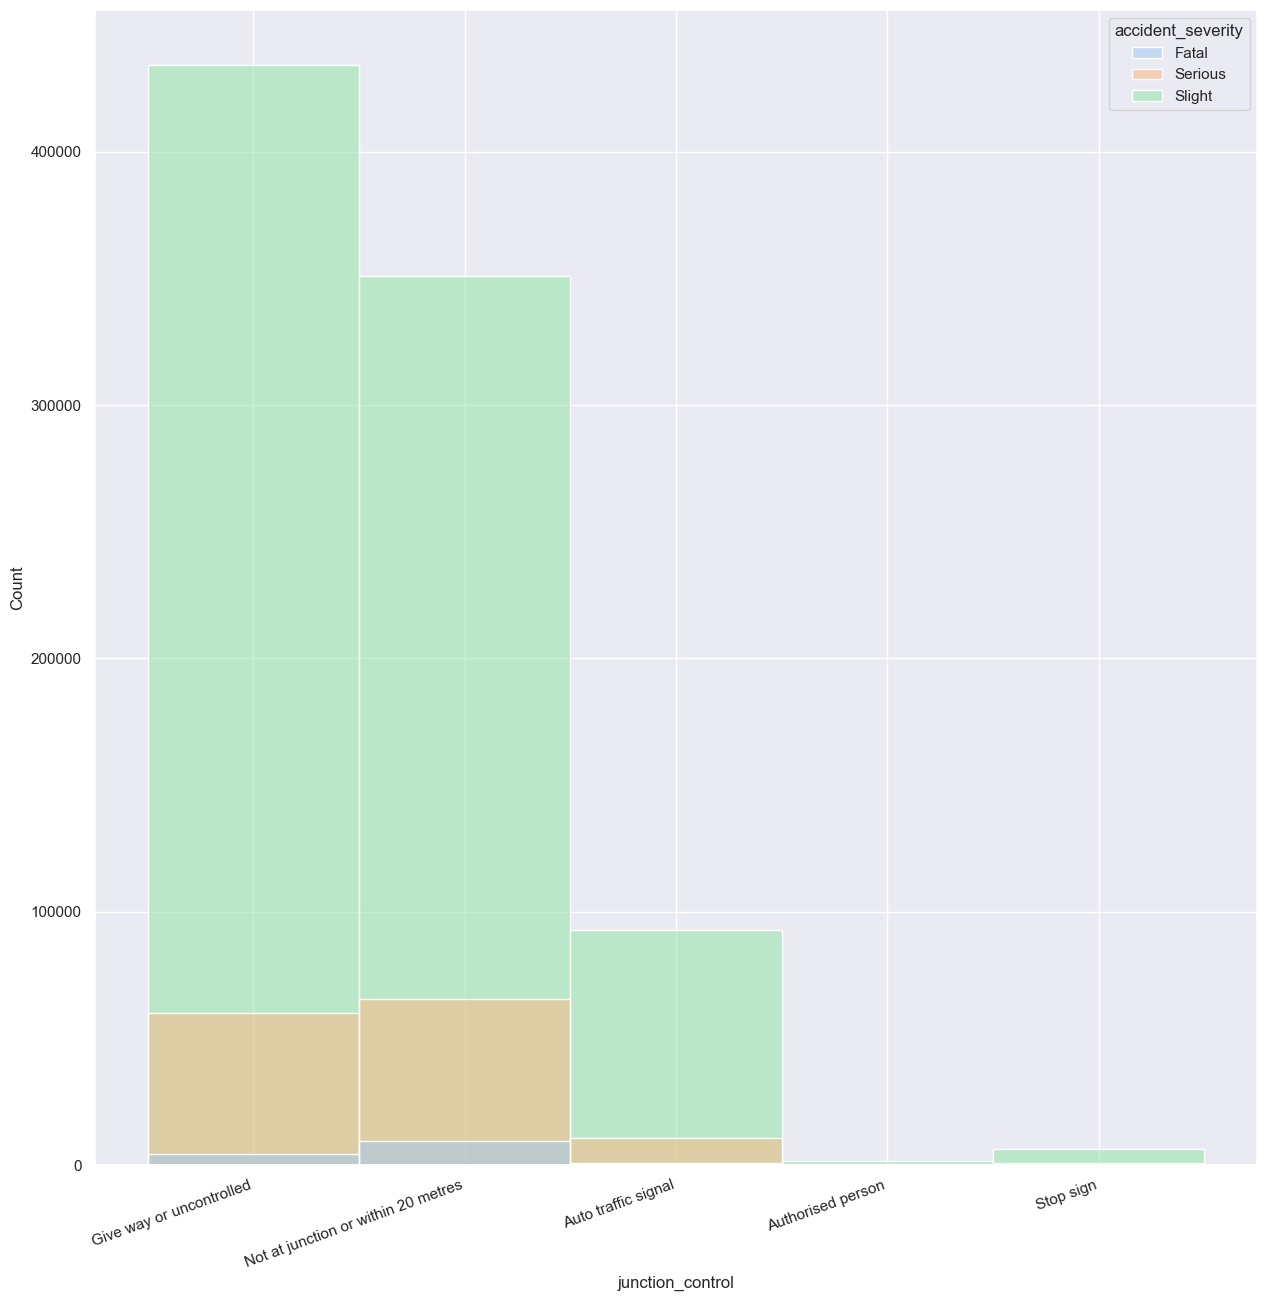

In [267]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='junction_control', bins=5, hue='accident_severity')

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=20,
                   horizontalalignment='right'
                   )
None

plt.show()

We can see that most RTC's happen at a give way or uncontrolled junction.  
  
Lets check individual attributes against severity.

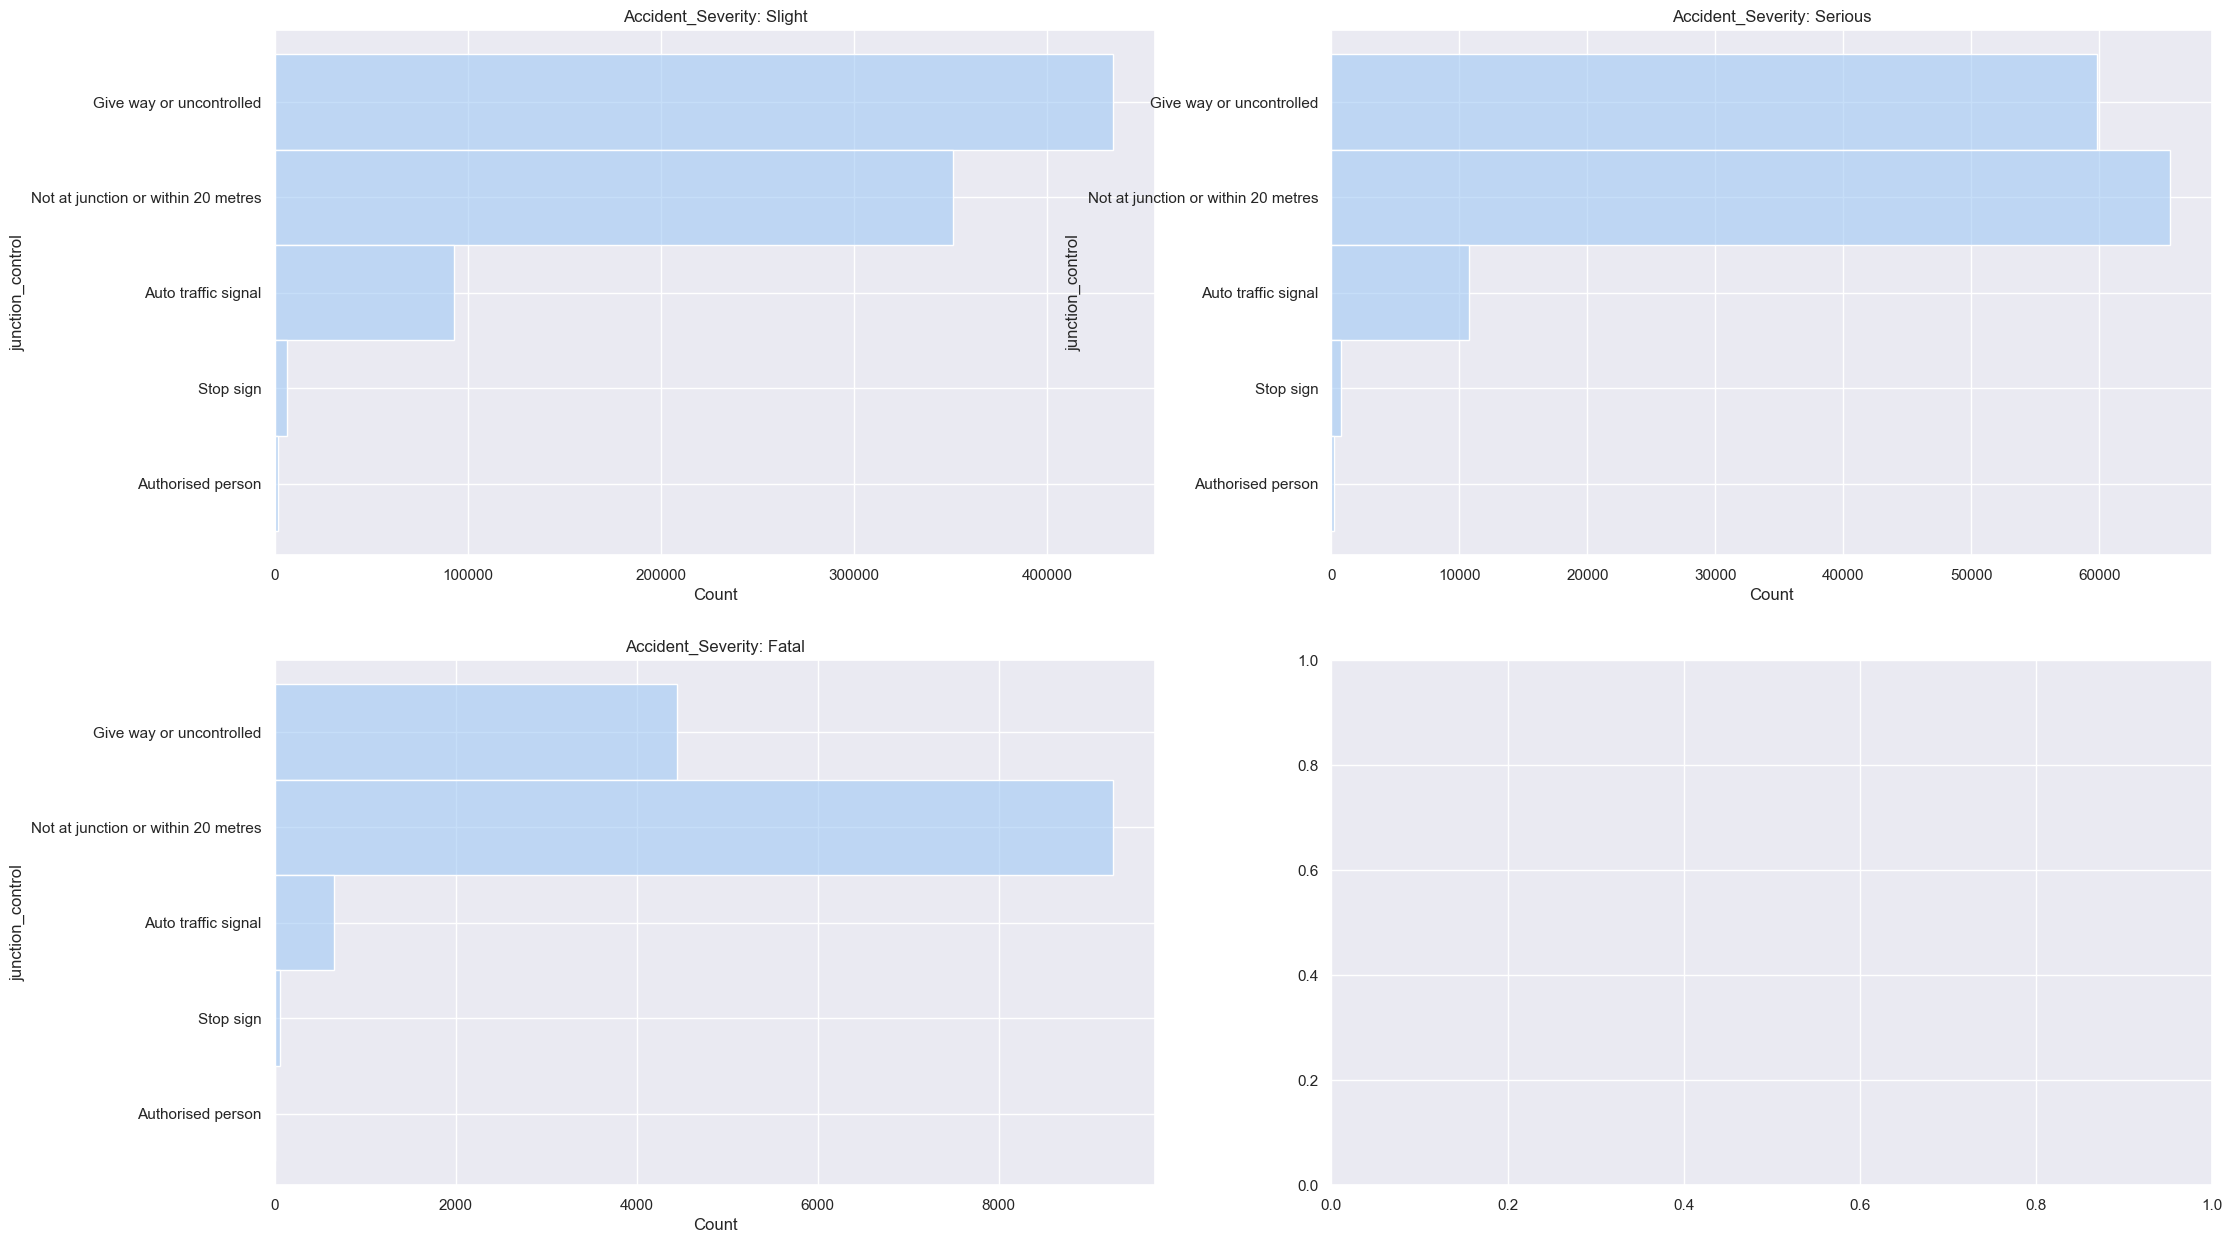

In [268]:
df_accident.junction_control = pd.Categorical(values=df_accident.junction_control,
                                    categories=['Give way or uncontrolled',
                                                'Not at junction or within 20 metres',
                                                'Auto traffic signal',
                                                'Stop sign',
                                                'Authorised person'
                                                ]
                                         ) # Set the order for the column
df_accident.sort_values(['junction_control'], inplace=True) # Sort the column

fig, ax = plt.subplots(2, 2, figsize=(25, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='junction_control',
             alpha=0.6, bins=50, ax=ax[0, 0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='junction_control',
             alpha=0.6, bins=50, ax=ax[0, 1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='junction_control',
             alpha=0.6, bins=50, ax=ax[1, 0]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

Here we can see that `Slight` and `Severe` accidents do increase at a `Give way or uncontrolled` junction, `Fatal` RTC's reduce.  
`Fatal` accidents are more inclined to happen away from a junction.

#### Feature - `Junction_Detail`

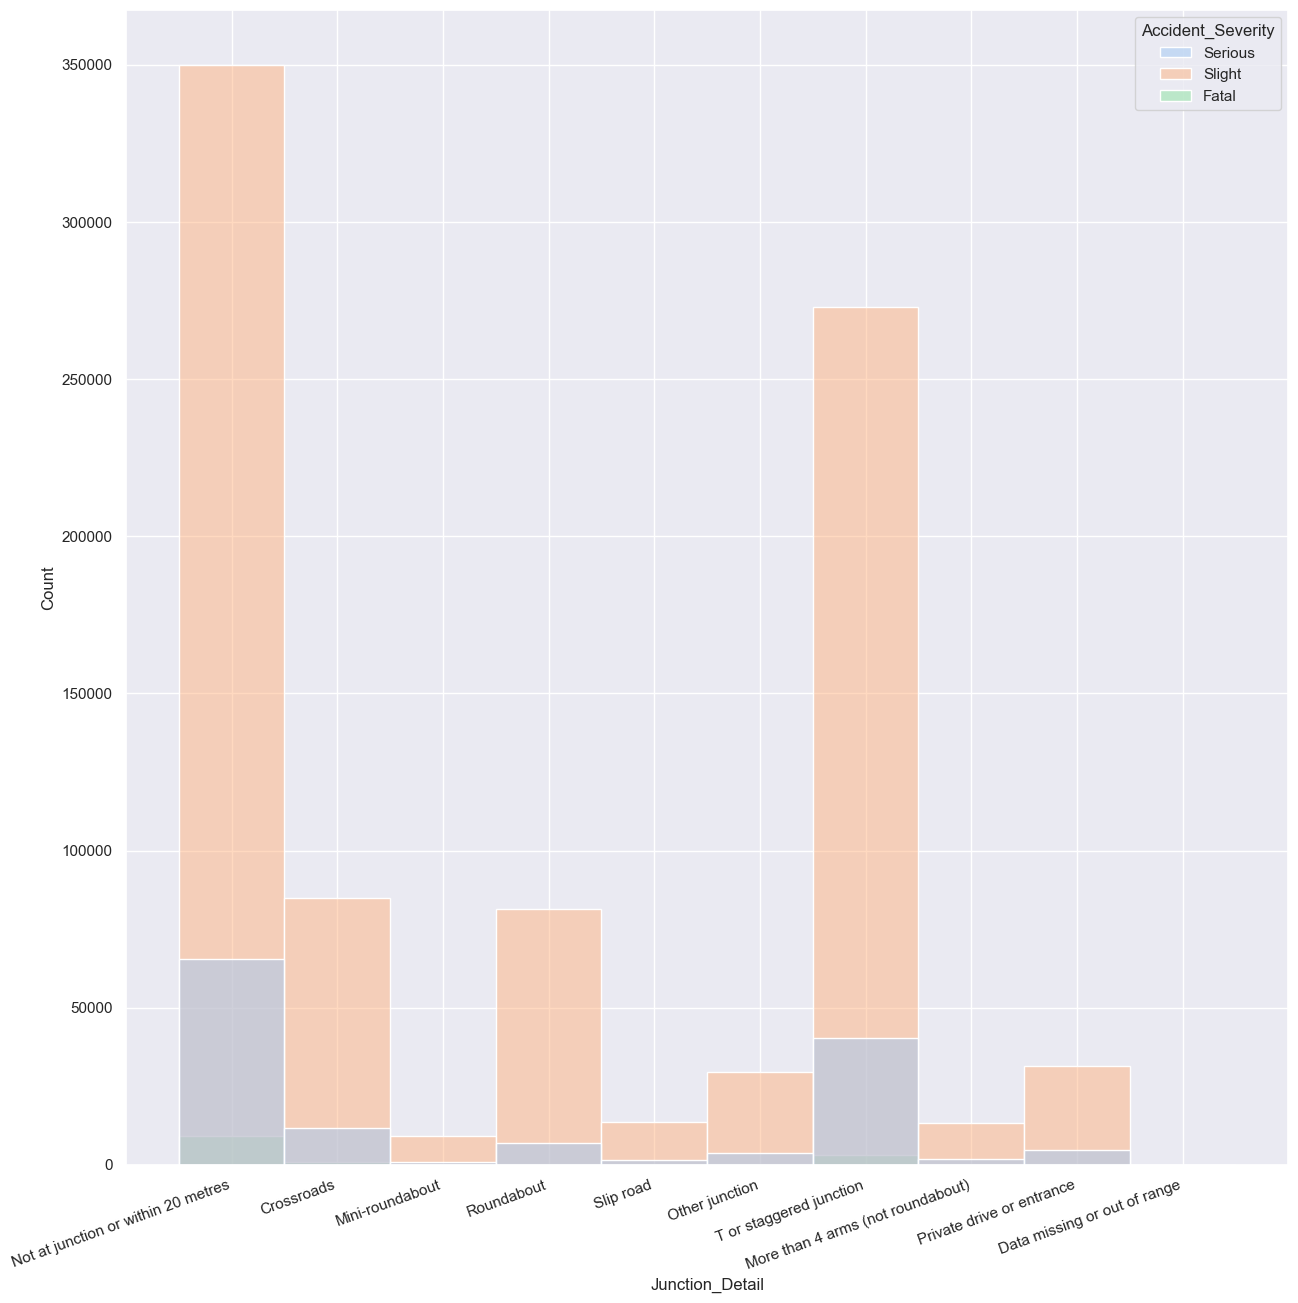

In [57]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='Junction_Detail', bins=5, hue='Accident_Severity')

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=20,
                   horizontalalignment='right'
                   )
None


In [58]:
df_accident['Junction_Detail'].value_counts(dropna=False, ascending=False)

Not at junction or within 20 metres    424626
T or staggered junction                316314
Crossroads                              97354
Roundabout                              88567
Private drive or entrance               36686
Other junction                          33481
Slip road                               15480
More than 4 arms (not roundabout)       15286
Mini-roundabout                          9955
Data missing or out of range                4
Name: Junction_Detail, dtype: int64

In [59]:
df_accident[
            'Junction_Detail'
            ] = df_accident[
                            'Junction_Detail'
                            ].replace(to_replace='Data missing or out of range',
                                      value='Not at junction or within 20 metres'
                                      )

In [60]:
df_accident['Junction_Detail'].value_counts(dropna=False, ascending=False)

Not at junction or within 20 metres    424630
T or staggered junction                316314
Crossroads                              97354
Roundabout                              88567
Private drive or entrance               36686
Other junction                          33481
Slip road                               15480
More than 4 arms (not roundabout)       15286
Mini-roundabout                          9955
Name: Junction_Detail, dtype: int64

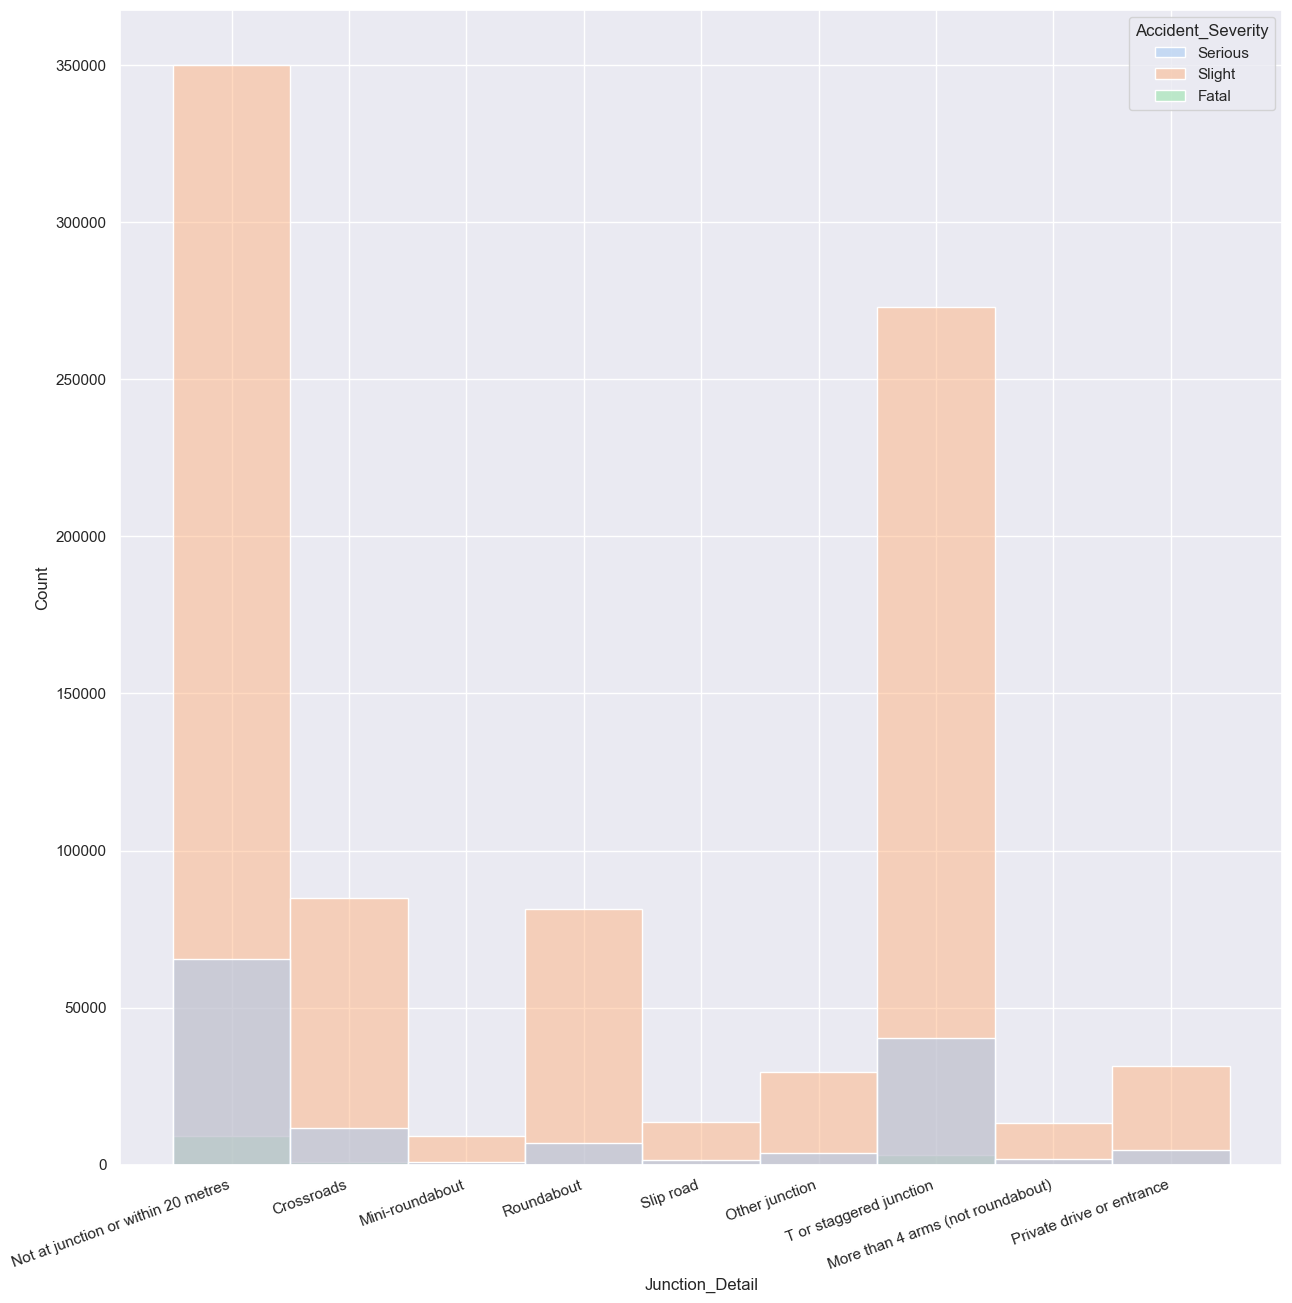

In [61]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='Junction_Detail', bins=5, hue='Accident_Severity')

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=20,
                   horizontalalignment='right'
                   )
None

plt.show()

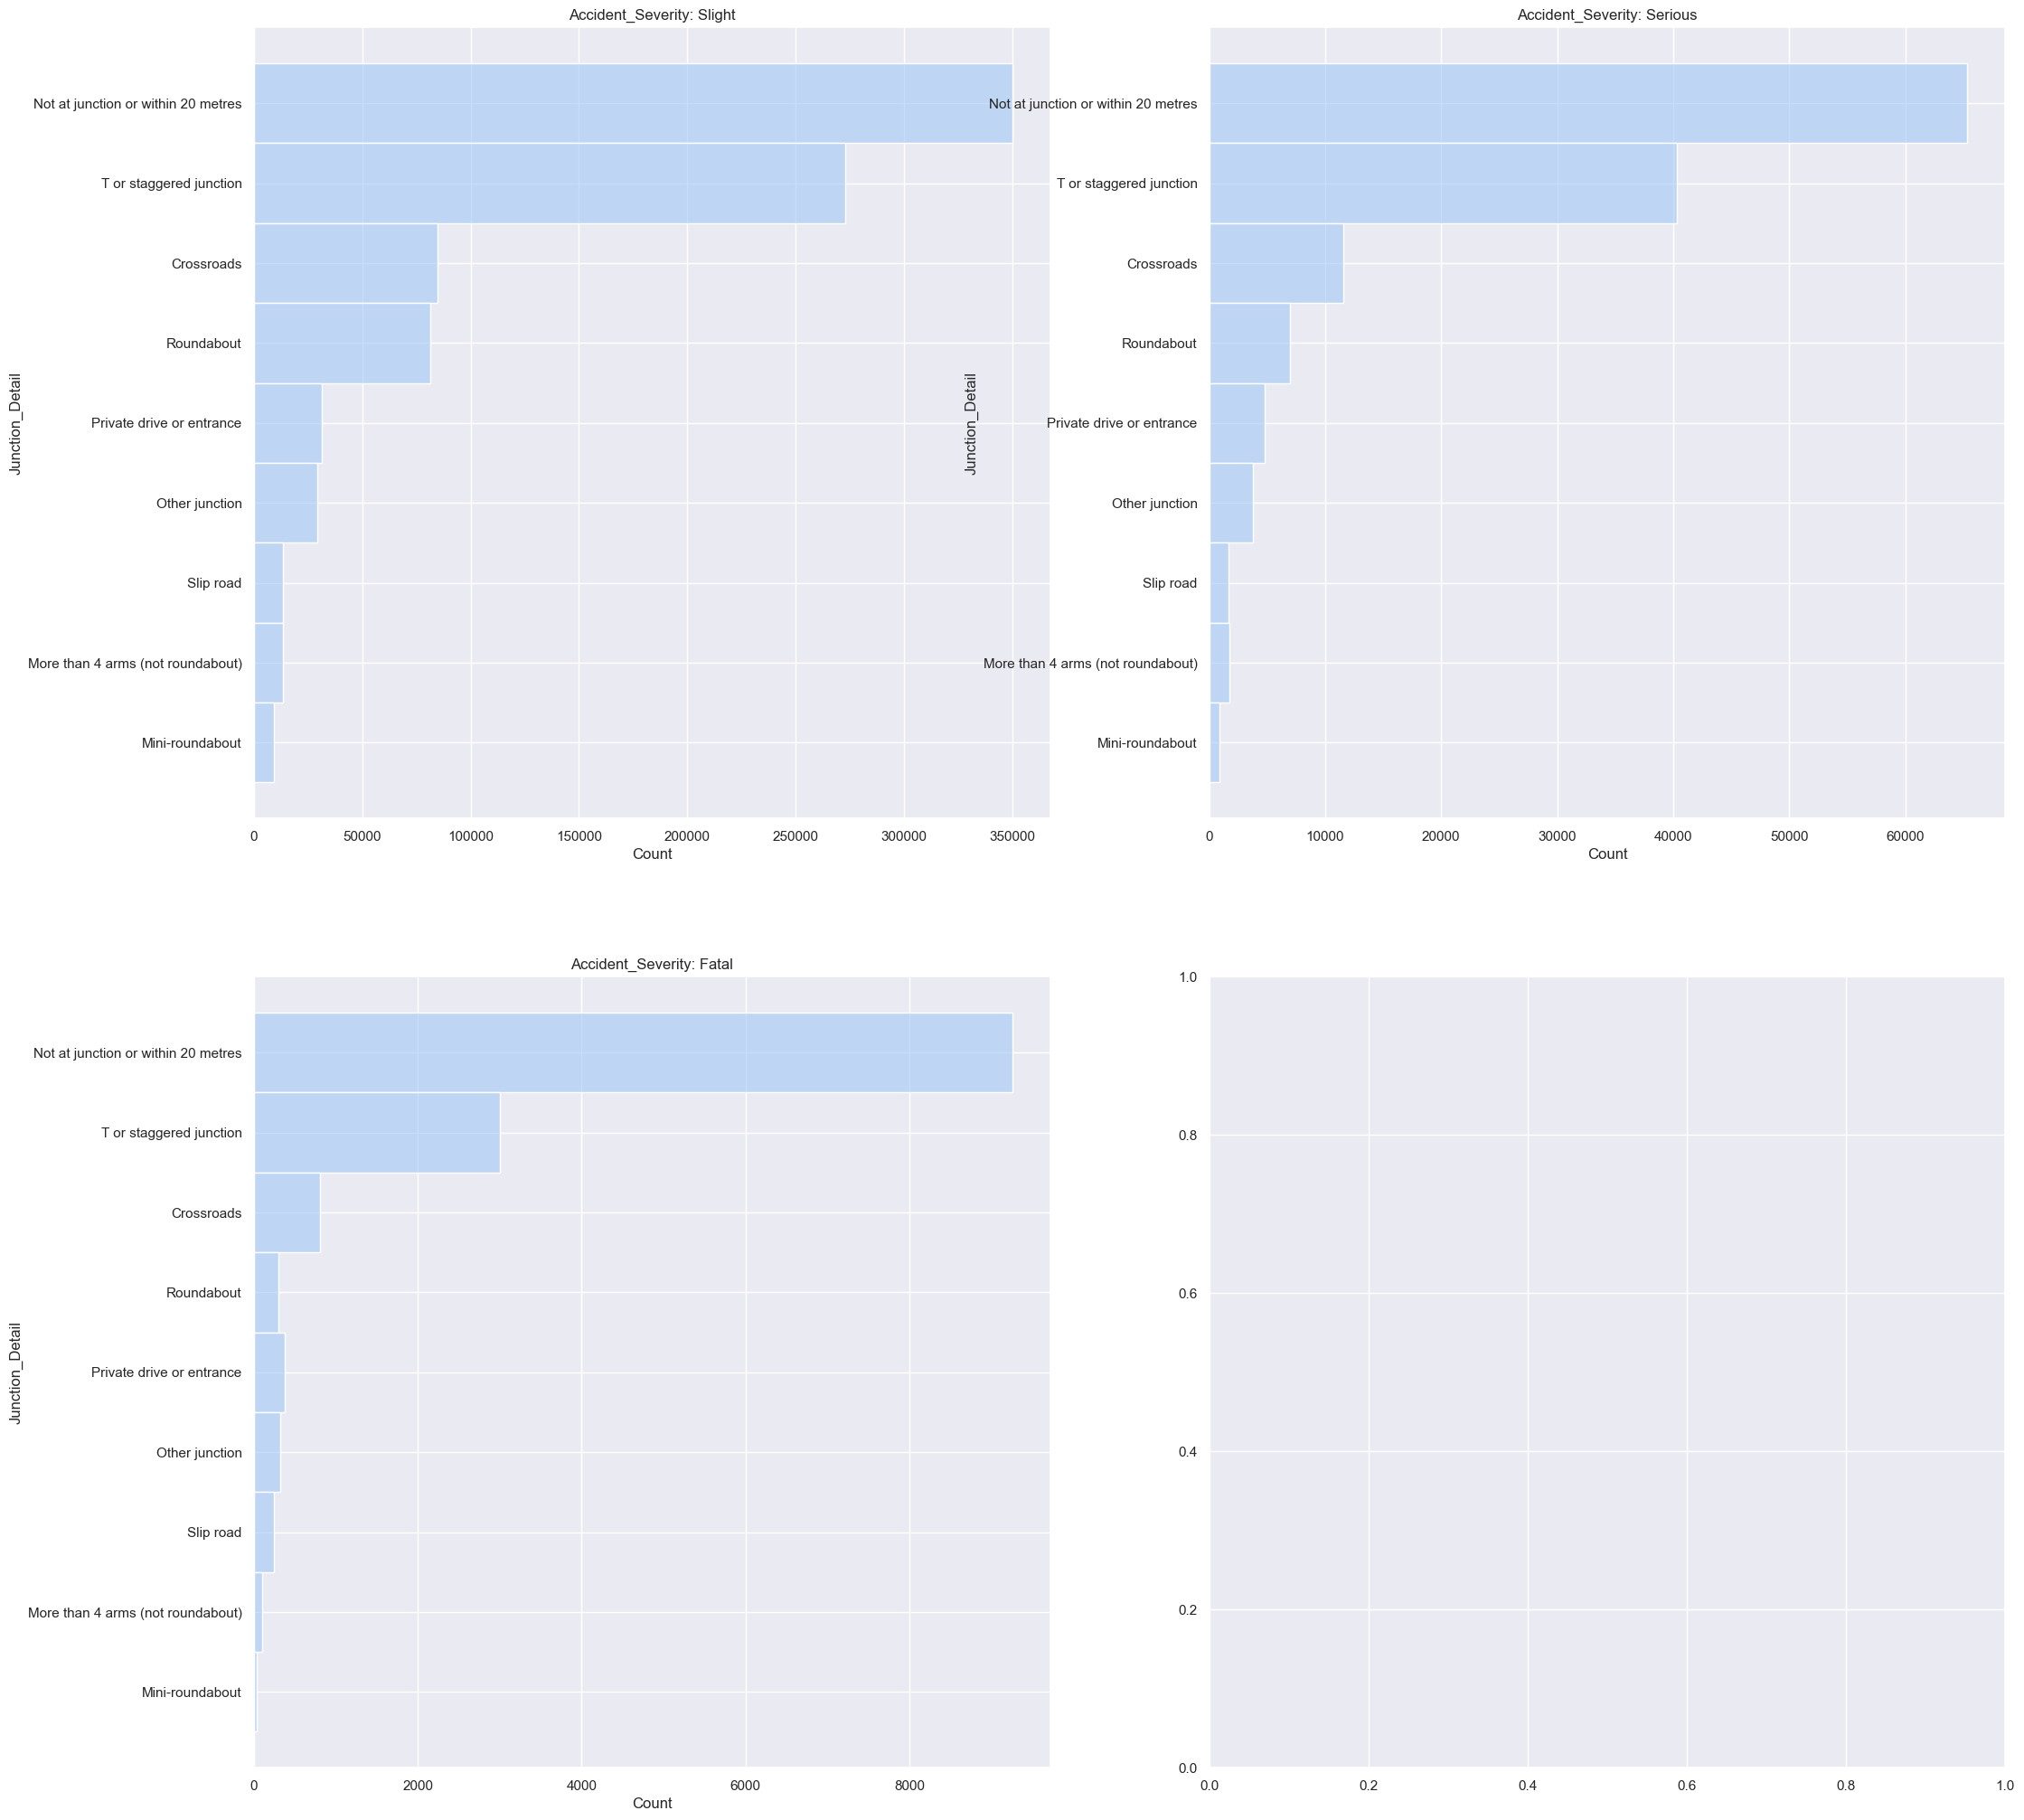

In [62]:
df_accident.Junction_Detail = pd.Categorical(values=df_accident.Junction_Detail,
                                             categories=[
                                                'Not at junction or within 20 metres',
                                                'T or staggered junction',
                                                'Crossroads',
                                                'Roundabout',
                                                'Private drive or entrance',
                                                'Other junction',
                                                'Slip road',
                                                'More than 4 arms (not roundabout)',
                                                'Mini-roundabout',
                                                'Authorised person'
                                             ]
                                             ) # Sort the attributes
df_accident.sort_values(['Junction_Detail'], inplace=True) # Sort the column

fig, ax = plt.subplots(2, 2, figsize=(25, 25))

sns.histplot(df_accident[df_accident['Accident_Severity'] == 'Slight'],
             y='Junction_Detail',
             alpha=0.6, bins=50, ax=ax[0, 0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["Accident_Severity"] == "Serious"],
             y='Junction_Detail',
             alpha=0.6, bins=50, ax=ax[0, 1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["Accident_Severity"] == "Fatal"],
             y='Junction_Detail',
             alpha=0.6, bins=50, ax=ax[1, 0]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

#### Feature - `Light_Conditions`

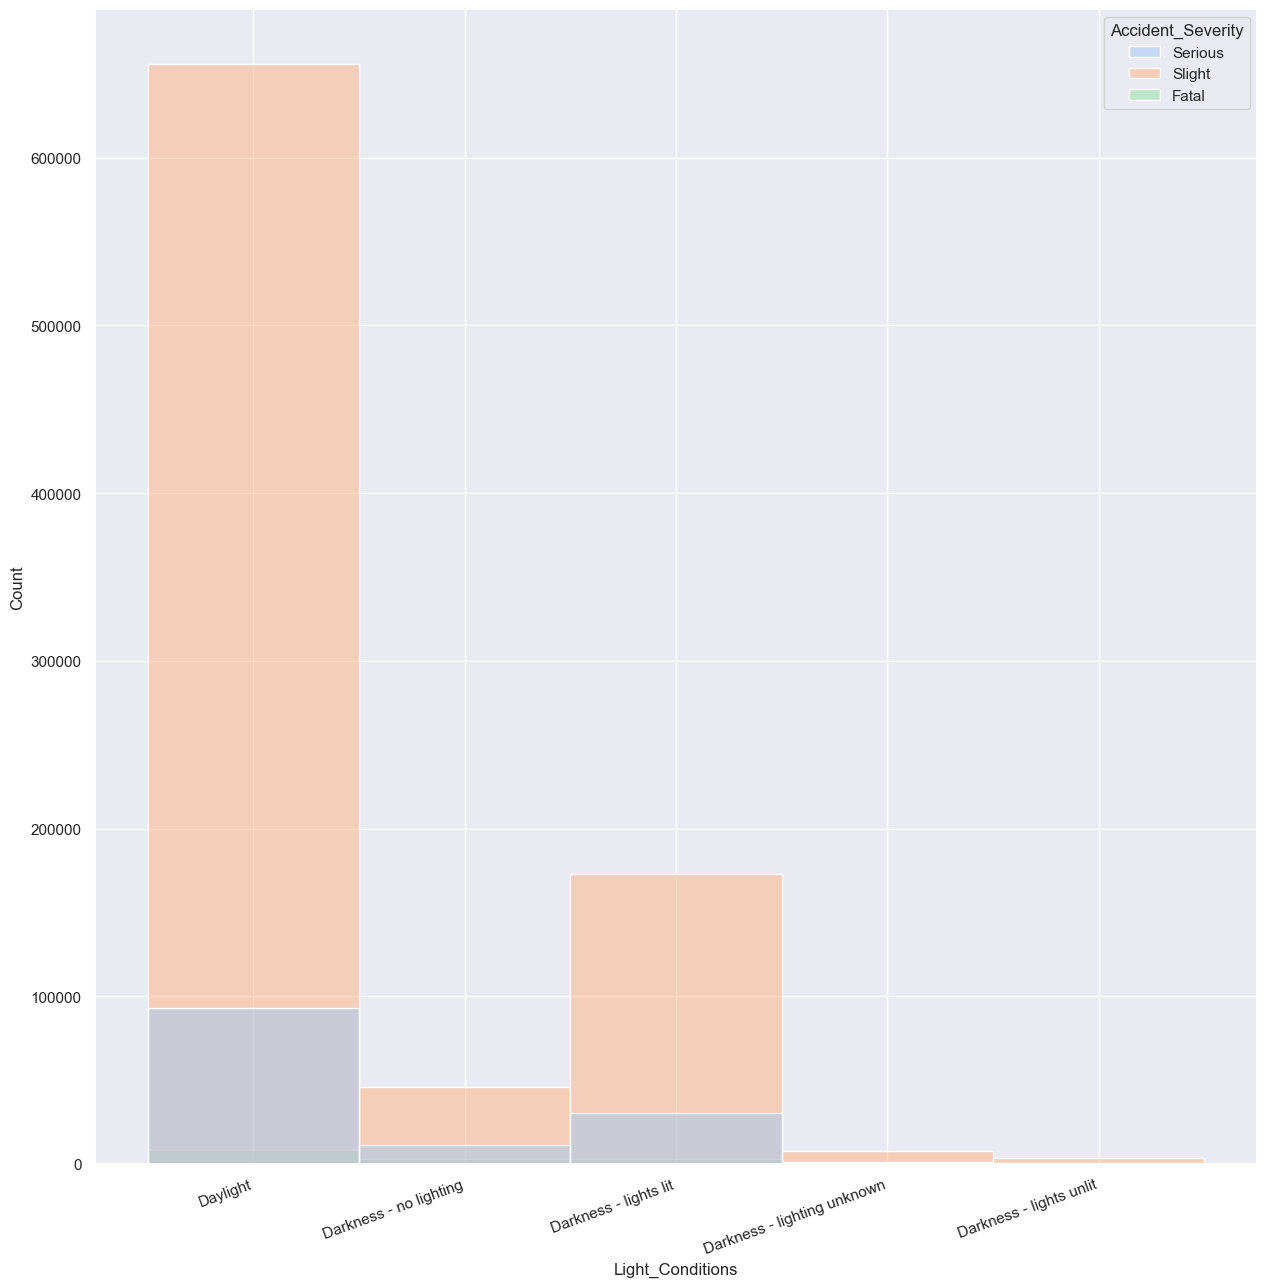

In [63]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='Light_Conditions', bins=5, hue='Accident_Severity')

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=20,
                   horizontalalignment='right'
                   )
None

plt.show()

We can see that the RTC's are much more common during daylight hours.  
  
Lets have la look at the correlations between feature attributes and Accident Severity.

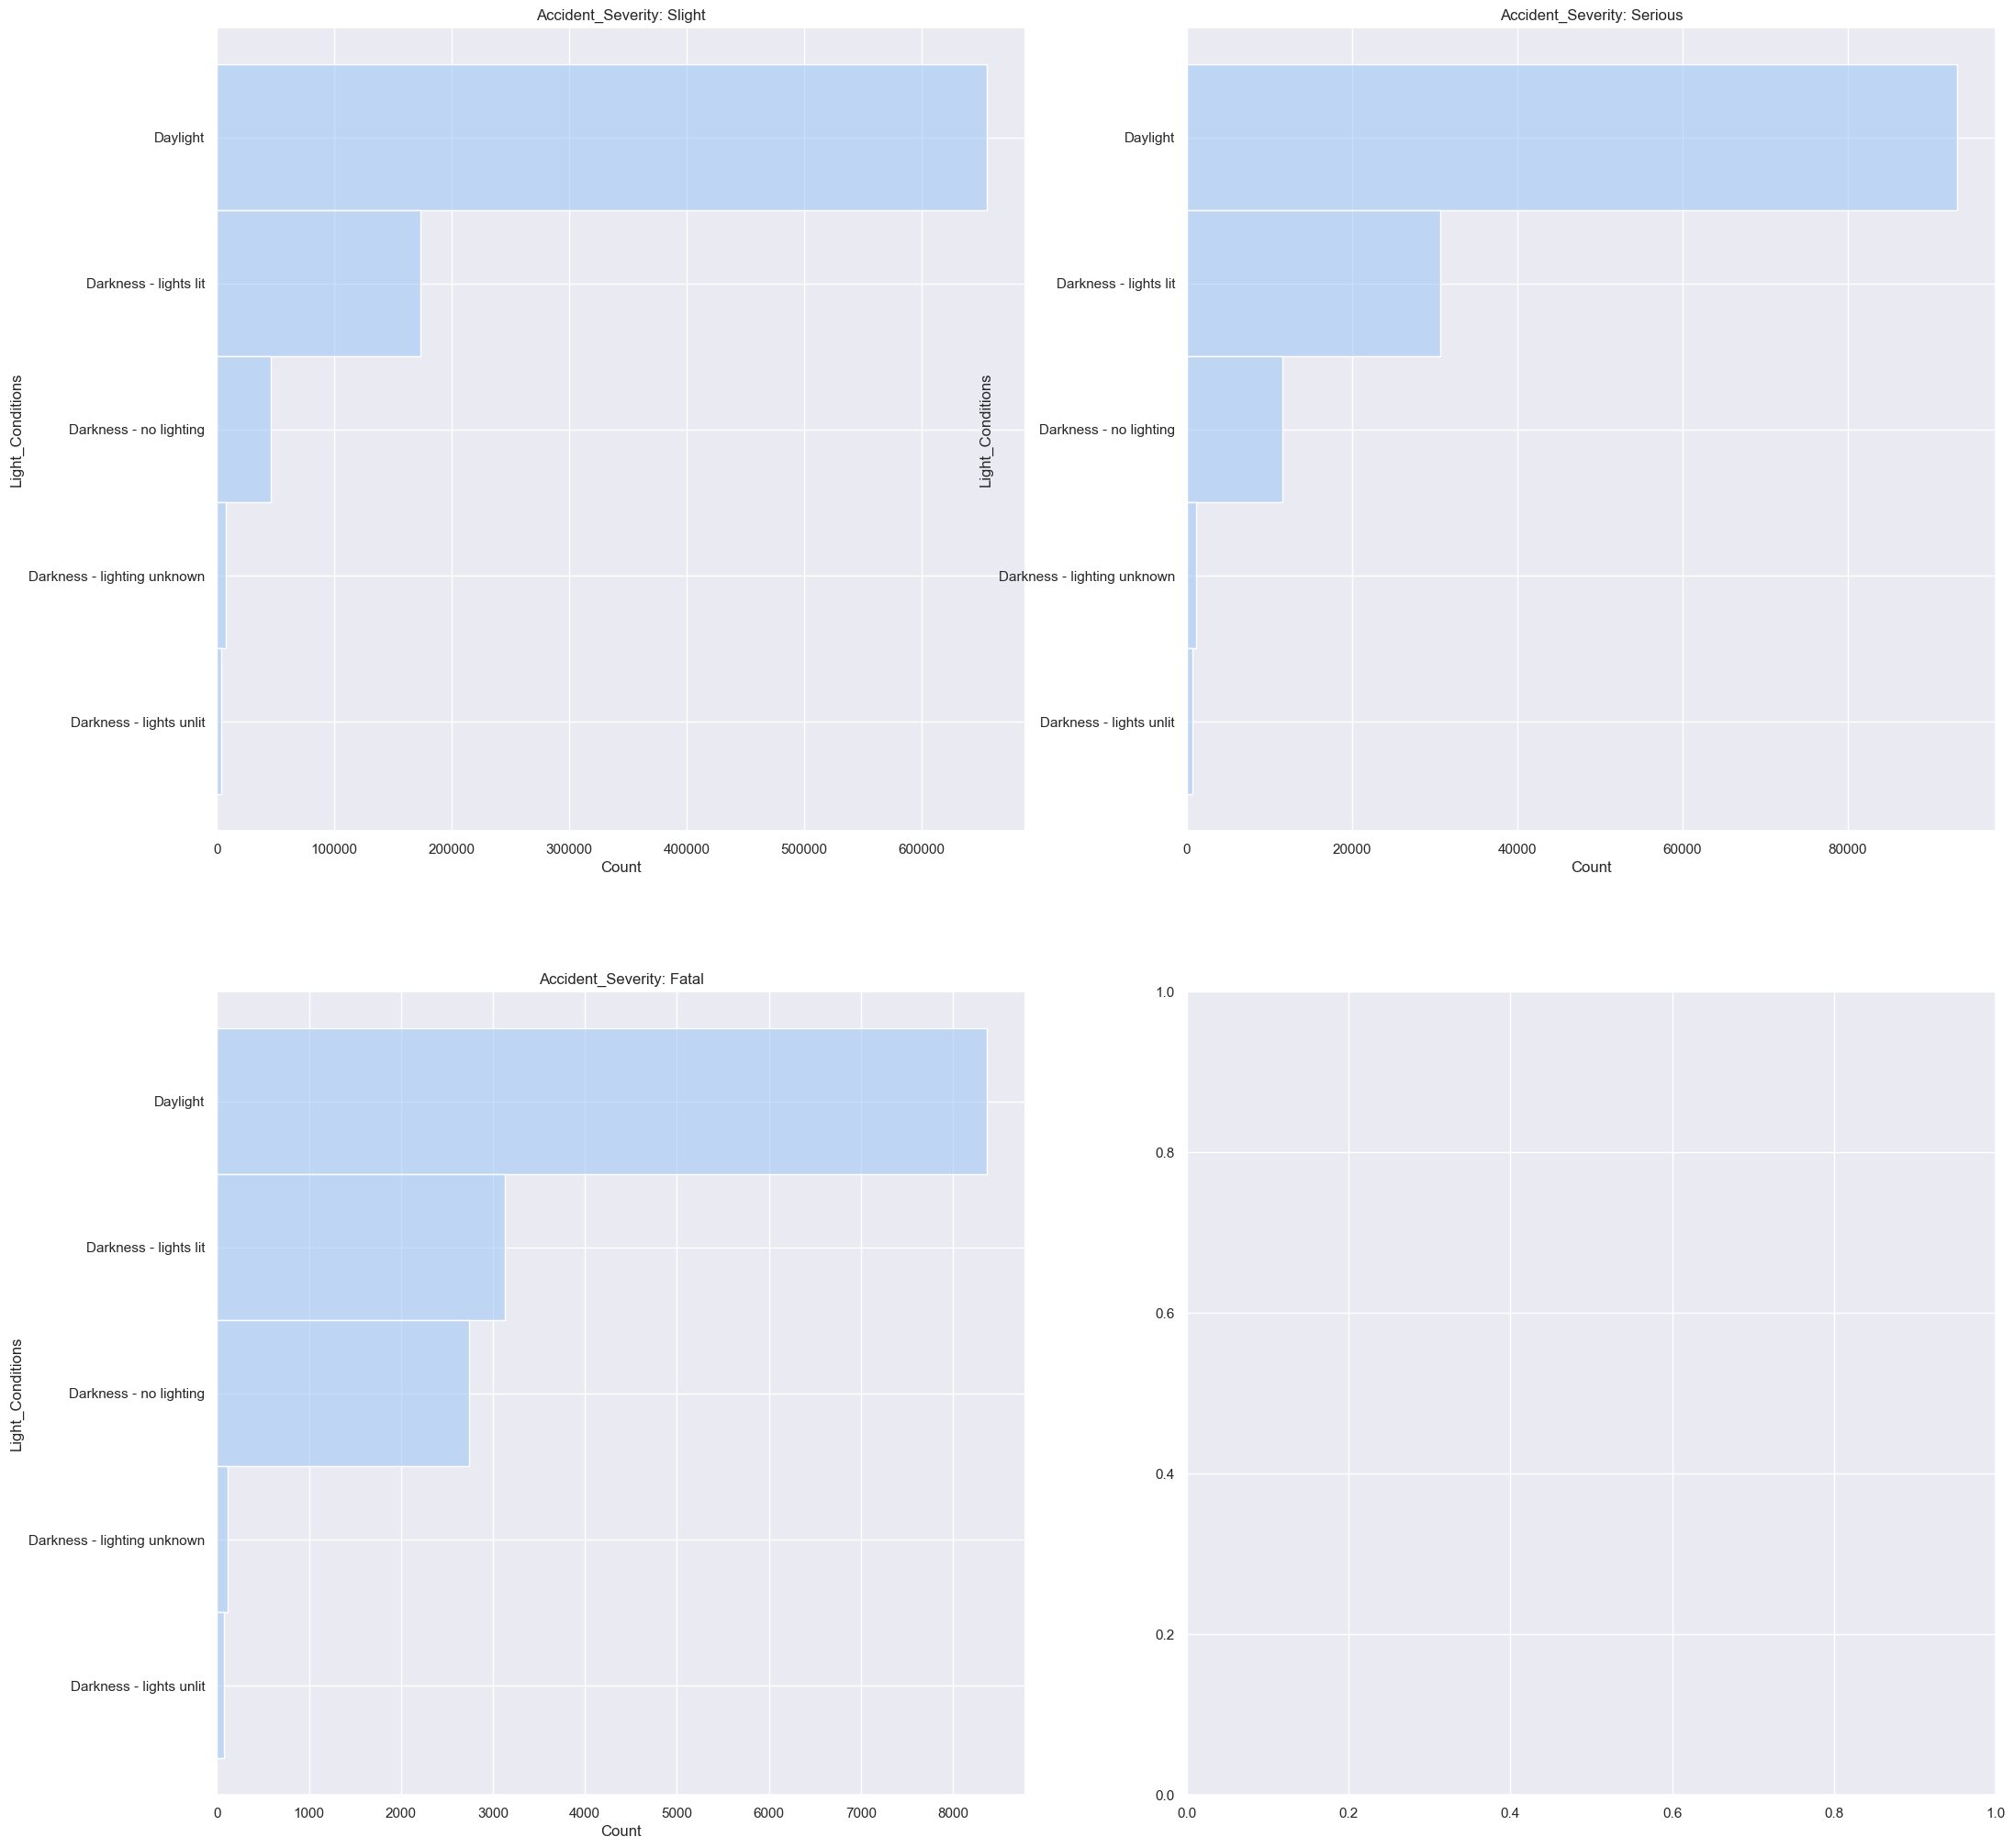

In [64]:
df_accident.Light_Conditions = pd.Categorical(values=df_accident.Light_Conditions,
                                             categories=[
                                                'Daylight',
                                                'Darkness - lights lit',
                                                'Darkness - no lighting',
                                                'Darkness - lighting unknown',
                                                'Darkness - lights unlit'
                                             ]
                                             ) # Sort the attributes
df_accident.sort_values(['Light_Conditions'], inplace=True) # Sort the column

fig, ax = plt.subplots(2, 2, figsize=(25, 25))

sns.histplot(df_accident[df_accident['Accident_Severity'] == 'Slight'],
             y='Light_Conditions',
             alpha=0.6, bins=50, ax=ax[0, 0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["Accident_Severity"] == "Serious"],
             y='Light_Conditions',
             alpha=0.6, bins=50, ax=ax[0, 1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["Accident_Severity"] == "Fatal"],
             y='Light_Conditions',
             alpha=0.6, bins=50, ax=ax[1, 0]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

It still appears that RTC's are much more common in the daylight, however what will happen if we combine all the night time conditions together.  
  
Lets have a quick look at the unique values of `Light_Conditions`.

In [65]:
df_accident['Light_Conditions'].value_counts(dropna=False, ascending=False)

Daylight                       757415
Darkness - lights lit          206734
Darkness - no lighting          60411
Darkness - lighting unknown      8929
Darkness - lights unlit          4264
Name: Light_Conditions, dtype: int64

Lets combine `Darkness - lights lit`, `Darkness - no lighting`, `Darkness - lighting unknown`, and `Darkness - lights unlit` to `Darkness`.  
  
We will then replot the visual.

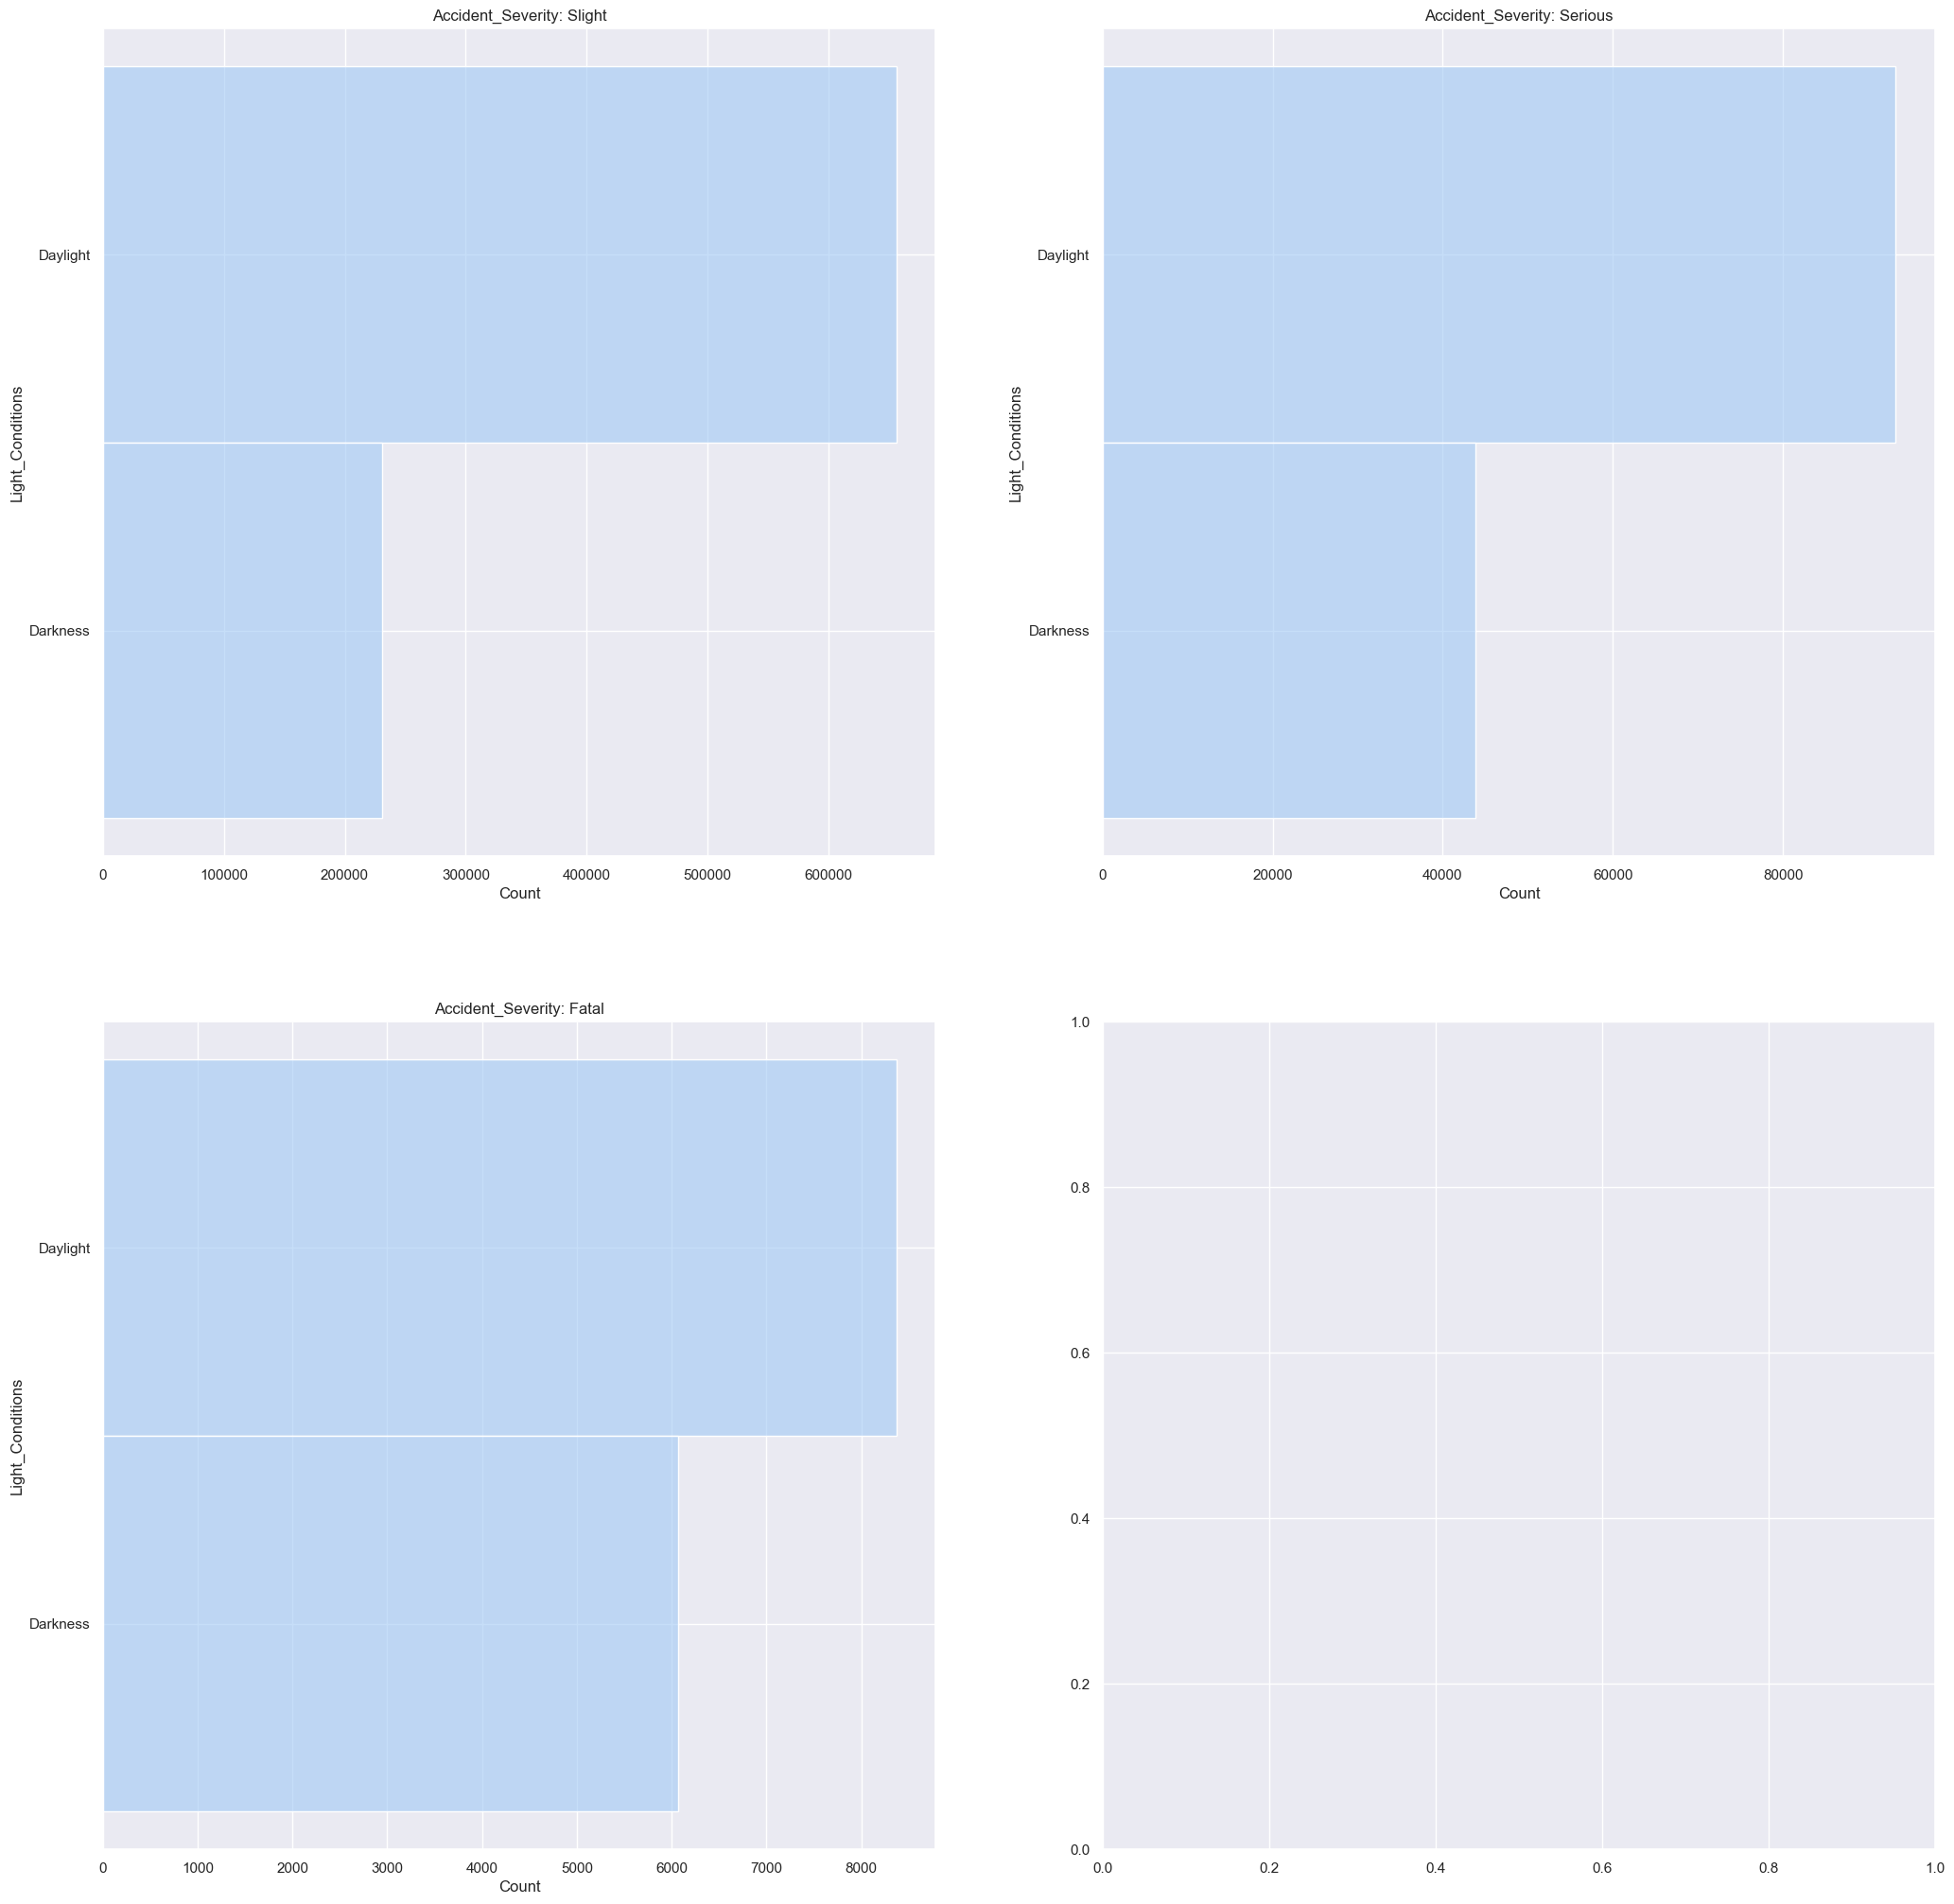

In [66]:
df2 = df_accident.copy()
df2['Light_Conditions'] = df2['Light_Conditions'].map({'Darkness - lights lit': 'Darkness',
                                                       'Darkness - no lighting': 'Darkness',
                                                       'Darkness - lighting unknown': 'Darkness',
                                                       'Darkness - lights unlit': 'Darkness'}
                                                      ).fillna(df2['Light_Conditions'])


fig, ax = plt.subplots(2, 2, figsize=(25, 25))

sns.histplot(df2[df2['Accident_Severity'] == 'Slight'],
             y='Light_Conditions',
             alpha=0.6, bins=2, ax=ax[0, 0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df2[df2["Accident_Severity"] == "Serious"],
             y='Light_Conditions',
             alpha=0.6, bins=2, ax=ax[0, 1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df2[df2["Accident_Severity"] == "Fatal"],
             y='Light_Conditions',
             alpha=0.6, bins=2, ax=ax[1, 0]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

We can now see a upward trend in the **collision severity** during darkness.

In [67]:
df2['Light_Conditions'].value_counts(dropna=False, ascending=False)

Daylight    757415
Darkness    280338
Name: Light_Conditions, dtype: int64

#### Feature - `Pedestrian_Crossing-Human_Control`

In [68]:
df_accident['Pedestrian_Crossing-Human_Control'].value_counts(dropna=False, ascending=False)

0.0    1031677
2.0       3545
1.0       2531
Name: Pedestrian_Crossing-Human_Control, dtype: int64

We can see that these have been entered as `floats`, which is out of line with the data.  
Lets convert them to match the Police Accident Form.

In [69]:
df_accident['Pedestrian_Crossing-Human_Control'] = df_accident['Pedestrian_Crossing-Human_Control'].map({0.0: 'None within 50m',
                                                       1.0: 'School Crossing Patrol',
                                                       2.0: 'Other Authorised Control'}
                                                      ).fillna(df_accident['Pedestrian_Crossing-Human_Control'])

df_accident['Pedestrian_Crossing-Human_Control'].value_counts(dropna=False, ascending=False)


None within 50m             1031677
Other Authorised Control       3545
School Crossing Patrol         2531
Name: Pedestrian_Crossing-Human_Control, dtype: int64

In [72]:
df_accident['Light_Conditions'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1037753 entries, 107885 to 734677
Series name: Light_Conditions
Non-Null Count    Dtype   
--------------    -----   
1037753 non-null  category
dtypes: category(1)
memory usage: 8.9 MB


In [70]:
df_accident.Pedestrian_Crossing-Human_Control = pd.Categorical(values=df_accident.Pedestrian_Crossing-Human_Control,
                                             categories=[
                                                'None within 50m',
                                                'Other Authorised Control',
                                                'School Crossing Patrol'
                                             ]
                                             ) # Sort the attributes
df_accident.sort_values(['Pedestrian_Crossing-Human_Control'], inplace=True) # Sort the column

fig, ax = plt.subplots(2, 2, figsize=(25, 25))

sns.histplot(df_accident[df_accident['Accident_Severity'] == 'Slight'],
             y='Pedestrian_Crossing-Human_Control',
             alpha=0.6, bins=50, ax=ax[0, 0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["Accident_Severity"] == "Serious"],
             y='Pedestrian_Crossing-Human_Control',
             alpha=0.6, bins=50, ax=ax[0, 1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["Accident_Severity"] == "Fatal"],
             y='Pedestrian_Crossing-Human_Control',
             color='red',
             alpha=0.6, bins=50, ax=ax[1, 0]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (146912772.py, line 1)

<AxesSubplot: >

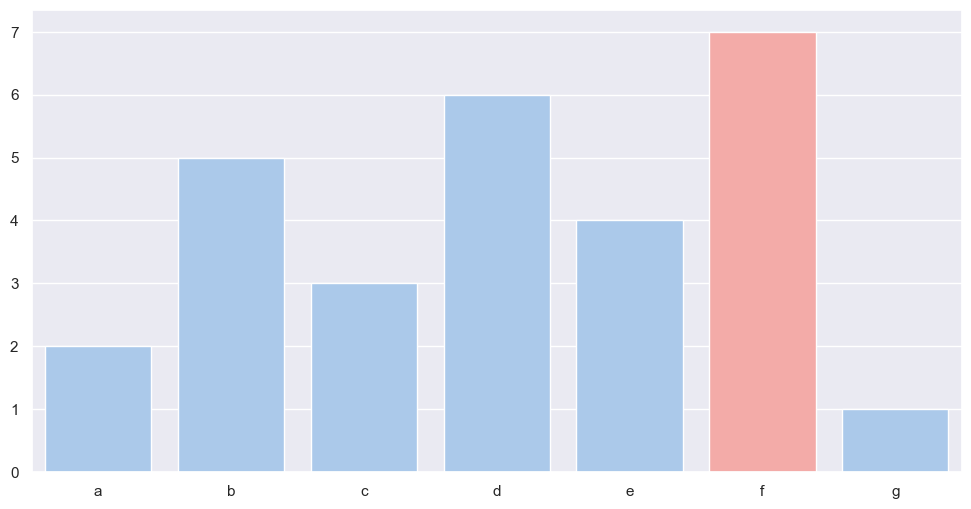

In [73]:
values = np.array([2,5,3,6,4,7,1])   
idx = np.array(list('abcdefg')) 
clrs = ['b' if (x < max(values)) else 'r' for x in values ]
sns.barplot(x=idx, y=values, palette=clrs)

In [74]:
df_accident['Hour'].max()

23

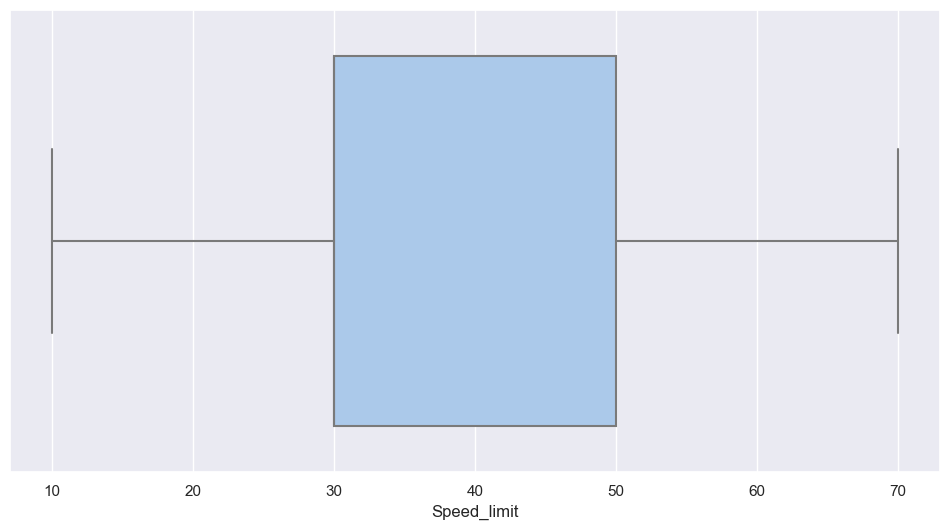

In [75]:
sns.boxplot(data=df_accident, x='Speed_limit')

plt.show()

In [76]:
len(df_accident[cols_upto_3].dropna())/len(df_accident)

NameError: name 'cols_upto_3' is not defined

In [ ]:
df_accident['Road_Surface_Conditions'].unique()

array(['Wet or damp', 'Dry', 'Frost or ice', 'Snow',
       'Flood over 3cm. deep', None], dtype=object)

In [ ]:
df_accident['Weather_Conditions'].value_counts()

Fine no high winds       831083
Raining no high winds    125484
Other                     26486
Raining + high winds      14697
Fine + high winds         13554
Snowing no high winds      8542
Fog or mist                6051
Snowing + high winds       1286
Name: Weather_Conditions, dtype: int64

In [ ]:
df_accident.loc[df_accident['Road_Surface_Conditions'] == 'Dry', 'Weather_Conditions'] = 'Fine no high winds'
# df_accident.loc[df_accident['Road_Surface_Conditions'] == 'Wet or damp', 'Weather_Conditions'] = 'Raining no high winds'

In [ ]:
print('1st_Road_Class''\n', f"Unique Values: {df_accident['1st_Road_Class'].nunique()}, \n{df_accident['1st_Road_Class'].unique()}", '\n')
print('2nd_Road_Class''\n', f"Unique Values: {df_accident['2nd_Road_Class'].nunique()}, \n{df_accident['2nd_Road_Class'].unique()}", '\n')
print('LSOA_of_Accident_Location''\n', f"Unique Values: {df_accident['LSOA_of_Accident_Location'].nunique()}, \n{df_accident['LSOA_of_Accident_Location'].unique()}")
print('Weather_Conditions''\n', f"Unique Values: {df_accident['Weather_Conditions'].nunique()}, \n{df_accident['Weather_Conditions'].unique()}")

1st_Road_Class
 Unique Values: 5, 
['A' 'B' 'C' None 'Motorway' 'A(M)'] 

2nd_Road_Class
 Unique Values: 6, 
[None 'C' 'Unclassified' 'B' 'A' 'Motorway' 'A(M)'] 

LSOA_of_Accident_Location
 Unique Values: 34226, 
['E01002849' 'E01002909' 'E01002857' ... 'W01001488' 'W01001386'
 'W01001123']
Weather_Conditions
 Unique Values: 8, 
['Raining no high winds' 'Fine no high winds' None 'Snowing no high winds'
 'Other' 'Fine + high winds' 'Raining + high winds' 'Fog or mist'
 'Snowing + high winds']



We will change `Weather_Conditions` with `Unknown`.  
We can leave `LSOA_of_Accident_Location` as this column has no real value to the **EDA** and will be dropped.
  
Lets remove columns that are not required for **EDA**.  
`The 1st_Road_Number`, `2nd_Road_Number` and `LSOA_of_Accident_Location` are not required for the **EDA**.

In [ ]:
df_accident.drop(['Accident_Index', 'Location_Northing_OSGR', 'Location_Easting_OSGR', 'LSOA_of_Accident_Location', '1st_Road_Number', '2nd_Road_Number', 'Did_Police_Officer_Attend_Scene_of_Accident', 'InScotland'], axis=1, inplace=True)  

In [ ]:
# df_accident.dropna(subset=['Carriageway_Hazards', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Latitude', 'Longitude', 'Light_Conditions', 'Pedestrian_Crossing-Human_Control', 'Time', 'Urban_or_Rural_Area', 'Pedestrian_Crossing-Physical_Facilities'], inplace=True)
df_accident['Weather_Conditions'].replace(np.NaN, 'Unknown', inplace=True)
df_accident['1st_Road_Class'].replace(np.NaN, 'Unclassified', inplace=True)
df_accident['1st_Road_Number'].replace(np.NaN, 'Unknown', inplace=True)
df_accident['2nd_Road_Class'].replace(np.NaN, 'No 2nd Road', inplace=True)
df_accident['2nd_Road_Number'].replace(np.NaN, 'Unknown', inplace=True)
df_accident['Road_Type'].replace(np.NaN, 'Unknown', inplace=True)

In [ ]:
df_accident.info()

In [ ]:
print('Road_Surface_Conditions''\n', f"Unique Values: {df_accident['Road_Surface_Conditions'].nunique()}, \n{df_accident['Road_Surface_Conditions'].unique()}", '\n')
print('Road_Type''\n', f"Unique Values: {df_accident['Road_Type'].nunique()}, \n{df_accident['Road_Type'].unique()}", '\n')

Road_Surface_Conditions
 Unique Values: 5, 
['Wet or damp' 'Dry' 'Frost or ice' 'Snow' 'Flood over 3cm. deep' None] 

Road_Type
 Unique Values: 5, 
['Single carriageway' 'Dual carriageway' 'One way street' 'Roundabout'
 'Slip road' None] 



Lets check for null values and remove all rows that have less than 2% null values.

In [ ]:
# columns having null values < 2%
null_values = df_accident.isnull().sum().sort_values(ascending=False)
nulls = null_values[null_values != 0] / df_accident.shape[0] * 100
dropnulls = nulls[nulls < 2].index.tolist()
print(f'Columns containing less than 2% NaNs:', '\n\n', dropnulls)
print(f'\n', 'Rows and columns:', df_accident.shape)

Columns containing less than 2% NaNs: 

 ['Light_Conditions', 'Road_Surface_Conditions', 'Longitude', 'Latitude', 'Time', 'Urban_or_Rural_Area', 'Pedestrian_Crossing-Physical_Facilities', 'Carriageway_Hazards', 'Pedestrian_Crossing-Human_Control', 'Special_Conditions_at_Site']

 Rows and columns: (1048569, 26)


In [ ]:
# Dropping null values  and reset index
for column in dropnulls:
  df_accident.drop(df_accident[df_accident[column].isnull()].index.tolist(), inplace=True)
  df_accident.reset_index(inplace=True, drop=True)

In [ ]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045003 entries, 0 to 1045002
Data columns (total 26 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   1st_Road_Class                           1045003 non-null  object 
 1   2nd_Road_Class                           1045003 non-null  object 
 2   Accident_Severity                        1045003 non-null  object 
 3   Carriageway_Hazards                      1045003 non-null  object 
 4   Date                                     1045003 non-null  object 
 5   Day_of_Week                              1045003 non-null  object 
 6   Junction_Control                         1045003 non-null  object 
 7   Junction_Detail                          1045003 non-null  object 
 8   Latitude                                 1045003 non-null  float64
 9   Light_Conditions                         1045003 non-null  object 
 10  Local_Authority_(D

In [ ]:
# drop duplicated rows and reset index
df_accident.drop_duplicates(inplace=True)
df_accident.reset_index(inplace=True, drop=True)
print(f'Number of duplicated rows:', df_accident.duplicated().sum())
print(f'Rows and columns:', df_accident.shape)

Number of duplicated rows: 0
Rows and columns: (1048569, 34)


In [ ]:
df_accident.columns[df_accident.isnull().any()]

Index([], dtype='object')

<AxesSubplot: >

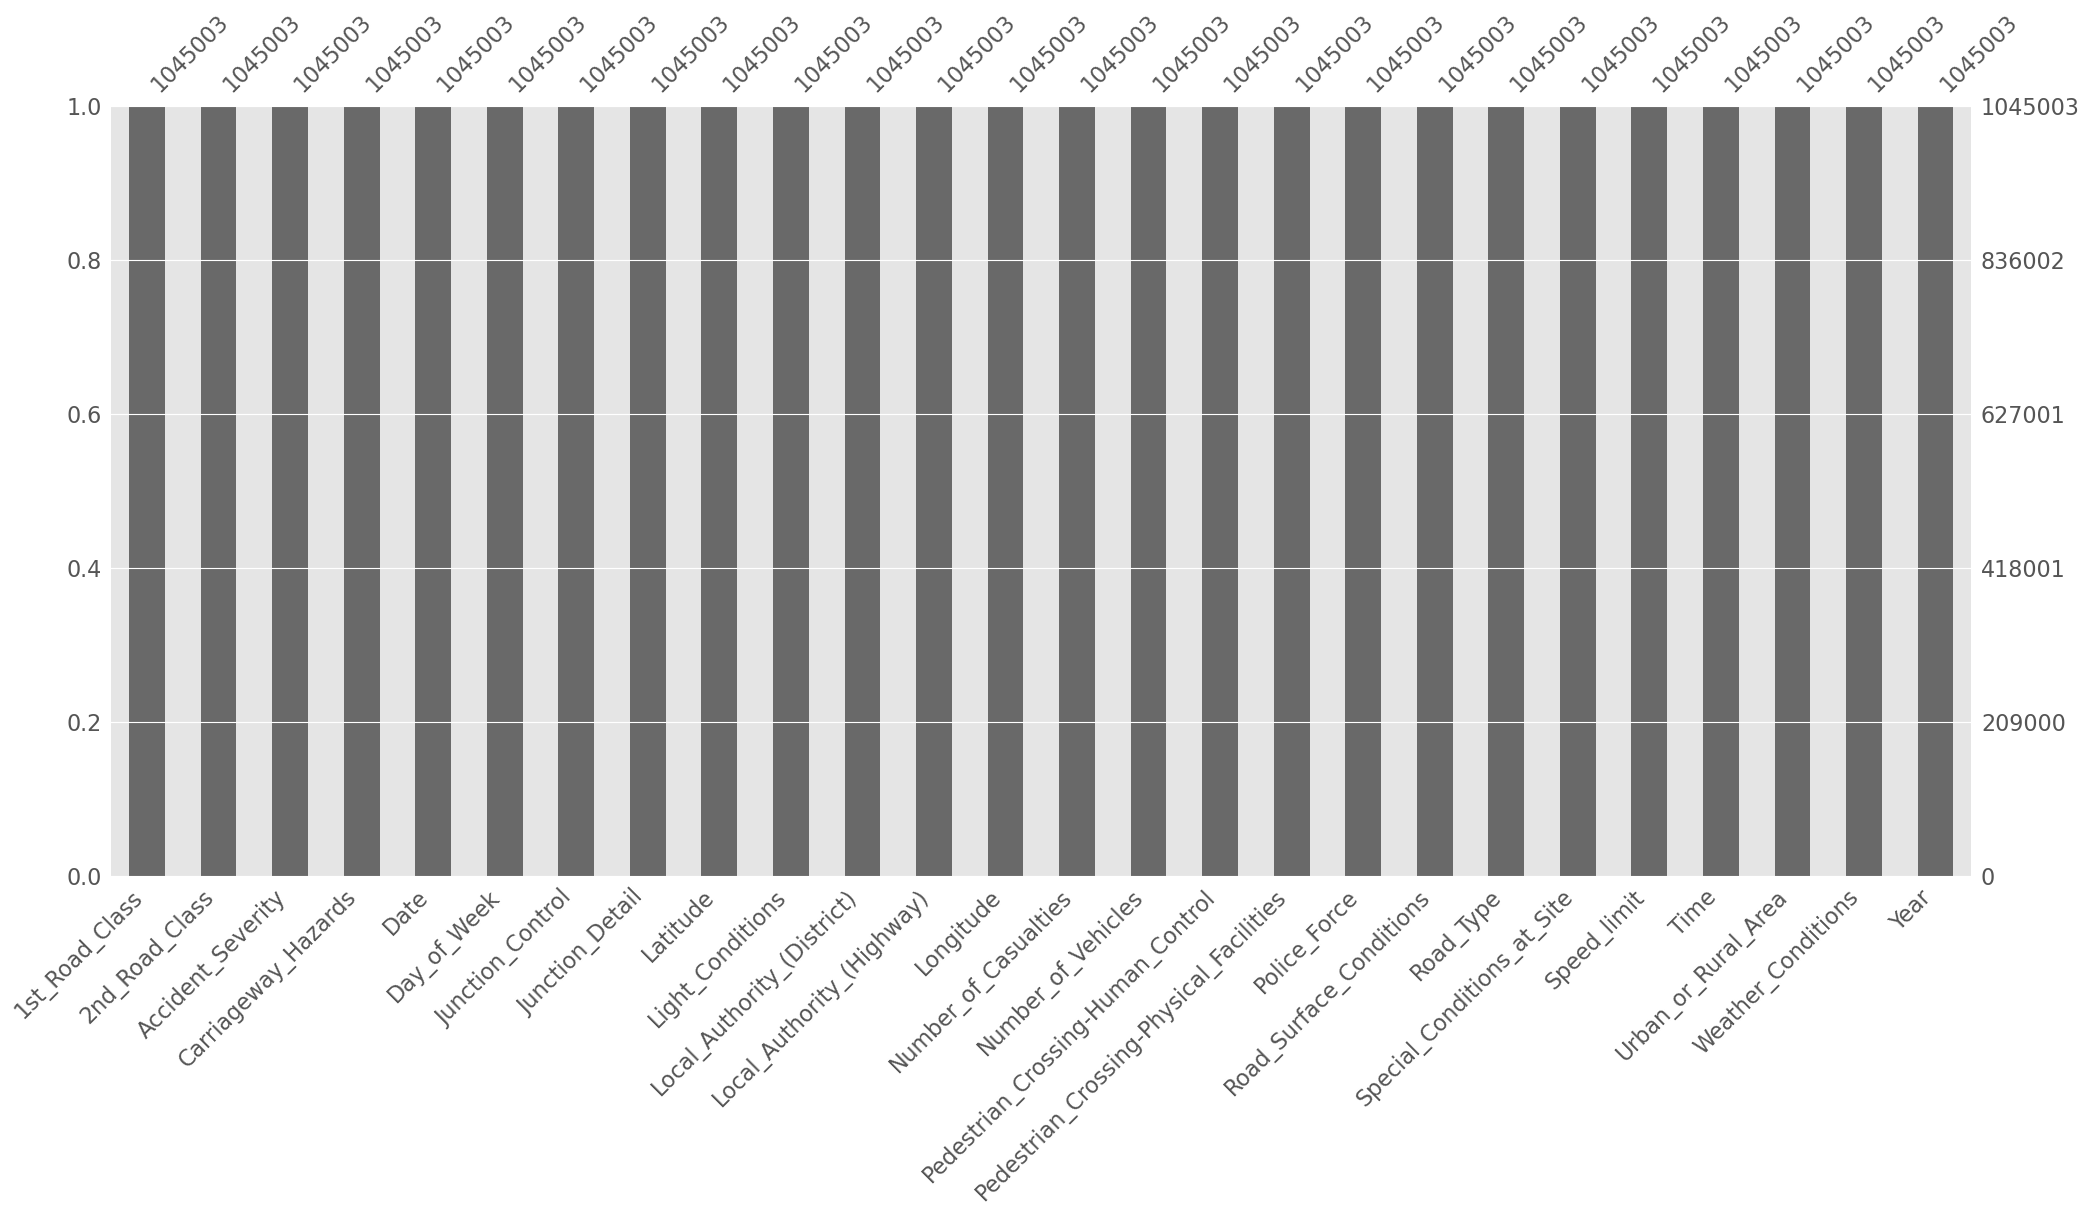

In [ ]:
msno.bar(df_accident)

In [ ]:
df_accident.shape

(1045003, 26)